# cygnus-paper
Figures for Cygnus paper using new config (`cygnus`, 100M warmup + 200M sim)

In [1]:
from collections import defaultdict
from importlib import reload
from matplotlib import colormaps
from utils import plots, stats, tables, utils

Matplotlib is building the font cache; this may take a moment.


# Configuration

In [2]:
base_dir = '/u/cmolder/GitHub/ChampSim/out/cygnus/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('spec17', 'weighted'),
    ('cloudsuite', 'weighted'),
    ('gap', 'one_phase'),
    ('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
    #'L2C_pf_issued',
    #'LLC_mpki',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
    # {'PC'}, 
]

baselines = ['bo', 'spp_dev2', 'spp_ppf_dev', 'bingo', 'mlop', 'dspatch', 'sms']
dpi = 150
cmaps = {
    'Pythia': colormaps['Blues'],
    'Pythia-Ignore': colormaps['Purples'],
    'Pythia-Width': colormaps['Greys'],
    'Cygnus': colormaps['Reds'],
    'Cygnus-Ignore': colormaps['Greens'],
    'Cygnus-Width': colormaps['Oranges'],
}

In [3]:
dfs = {
    # ===
    # ===== Degree 1 =====
    # ===
    # Baselines
    'degree1/baseline': tables.load_stats_csv(
        base_dir, 'degree1/baseline.csv', baselines, prefetchers_level='l2'),

    # Pythia
    'degree1/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/bwaware3.csv', features),

    # # Cygnus
    # 'degree1/cygnus/bwaware3': tables.load_stats_csv_pythia(
    #     base_dir, 'degree1/cygnus/bwaware3.csv',
    #     features, feature_key='cygnus_features'),

    # Cygnus-Ignore
    'degree1/cygnus/bwaware3_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/cygnus/bwaware3_ignorequeued.csv',
        features, feature_key='cygnus_features'),

    # # Pythia-Ignore
    # 'degree1/cygnus/bwaware3_pythialike_ignorequeued': tables.load_stats_csv_pythia(
    #     base_dir, 'degree1/cygnus/bwaware3_pythialike_ignorequeued.csv',
    #     features, feature_key='cygnus_features'),

    # ===
    # ===== Dynamic degree =====
    # ===
    # Baselines
    'degreedyn/baseline': tables.load_stats_csv(
        base_dir, 'degreedyn/baseline.csv', baselines, prefetchers_level='l2'),

    # 'degreedyn/spp/l2only': tables.load_stats_csv(
    #     base_dir, 'degreedyn/spp/l2only.csv', ['spp_dev2', 'spp_ppf_dev'], prefetchers_level='l2'),

    # BO-Width
    'degreedyn/bo/dynwidth/score16_fallback': tables.load_stats_csv(
        base_dir, 'degreedyn/bo/dynwidth/score16_fallback.csv', ['bo'], prefetchers_level='l2'),

    # Pythia
    'degreedyn/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3.csv', features),

    # # Cygnus
    # 'degreedyn/cygnus/bwaware3': tables.load_stats_csv_pythia(
    #     base_dir, 'degreedyn/cygnus/bwaware3.csv',
    #     features, feature_key='cygnus_features'),

    # Cygnus-Ignore
    'degreedyn/cygnus/bwaware3_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_ignorequeued.csv',
        features, feature_key='cygnus_features'),

    # Cygnus-Width-Real
    'degreedyn/cygnus/bwaware3_width_moreactions_real': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_width_moreactions_real.csv',
        features, feature_key='cygnus_features'),

    # Cygnus-Width-Real-MSHRAware
    'degreedyn/cygnus/bwaware3_width_moreactions_real_mshraware': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_width_moreactions_real_mshraware.csv',
        features, feature_key='cygnus_features'),

    # Cygnus-Width-Real-ActionPrio
    'degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio.csv',
        features, feature_key='cygnus_features'),

    # Cygnus-Width-Real-ActionPrio-Max8
    'degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio_max8': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio_max8.csv',
        features, feature_key='cygnus_features'),

    # Cygnus-Width Ideal
    'degreedyn/cygnus/bwaware3_width_moreactions_ideal': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/cygnus/bwaware3_width_moreactions_ideal.csv',
        features, feature_key='cygnus_features'),

    # # Pythia-Width
    # 'degreedyn/cygnus/bwaware3_pythialike_width_moreactions': tables.load_stats_csv_pythia(
    #     base_dir, 'degreedyn/cygnus/bwaware3_pythialike_width_moreactions.csv',
    #     features, feature_key='cygnus_features'),

    # # Pythia-Ignore
    # 'degreedyn/cygnus/bwaware3_pythialike_ignorequeued': tables.load_stats_csv_pythia(
    #     base_dir, 'degreedyn/cygnus/bwaware3_pythialike_ignorequeued.csv',
    #     features, feature_key='cygnus_features'),
}

# Plots

## Degree 1

In [4]:
degree1_1core_df = {
    'Cygnus': dfs['degree1/cygnus/bwaware3_ignorequeued']['Delta_Path, PC_Delta'],
    'Pythia': dfs['degree1/pythia/bwaware3']['Delta_Path, PC_Delta'],
    # 'Pythia +Ignore': dfs['degree1/cygnus/bwaware3_pythialike_ignorequeued']['Delta_Path, PC_Delta'],
    # 'Cygnus': dfs['degree1/cygnus/bwaware3']['Delta_Path, PC_Delta'],

    'BO': dfs['degree1/baseline']['bo'],
    'Bingo': dfs['degree1/baseline']['bingo'],
    'SPP': dfs['degree1/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['degree1/baseline']['spp_ppf_dev'],
}

degree1_1core_colors = defaultdict(lambda: None, {
    'Pythia': cmaps['Pythia'](0.65),
    'Pythia +Ignore': cmaps['Pythia-Ignore'](0.65),
    
    #'Cygnus': cmaps['Cygnus'](0.65),
    'Cygnus': cmaps['Cygnus-Ignore'](0.65),

    'Bingo': 'purple',
    'BO': 'goldenrod',
    'SPP': 'royalblue',
    'SPP+PPF': 'darkturquoise',
})

degree1_1core_hatches = defaultdict(lambda: None, {
    # 'Pythia': '\\\\',
    # 'Pythia +Ignore': '\\\\',
    
    # 'Cygnus': '//',
    # 'Cygnus +Ignore': '//',

    # 'Bingo': '.',
    # 'BO': 'o',
    # 'SPP': 'x',
    # 'SPP+PPF': 'x',
})

degree1_1core_legend_kwargs = {
    'ncol': 6,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degree1_1core_label_kwargs = {
    # 'rotation': 45,
    # 'ha': 'right',
    'fontsize': 7,
}

degree1_1core_suptitle = 'Baselines (512 KB, degree-1)'

### IPC improvement

In [5]:
reload(plots)
plots.plot_metric_means(degree1_1core_df, suites=suites, metric='ipc_improvement',
                        colors=degree1_1core_colors,
                        hatches=degree1_1core_hatches,
                        legend_kwargs=degree1_1core_legend_kwargs,
                        label_kwargs=degree1_1core_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ytick_distance=5,
                        ylim=(0, 35),
                        dpi=192, figsize=(5, 2.5),
                        suptitle=degree1_1core_suptitle)
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/deg1_results_summary.pdf')

KeyError: 'L1D_overpredictions'

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


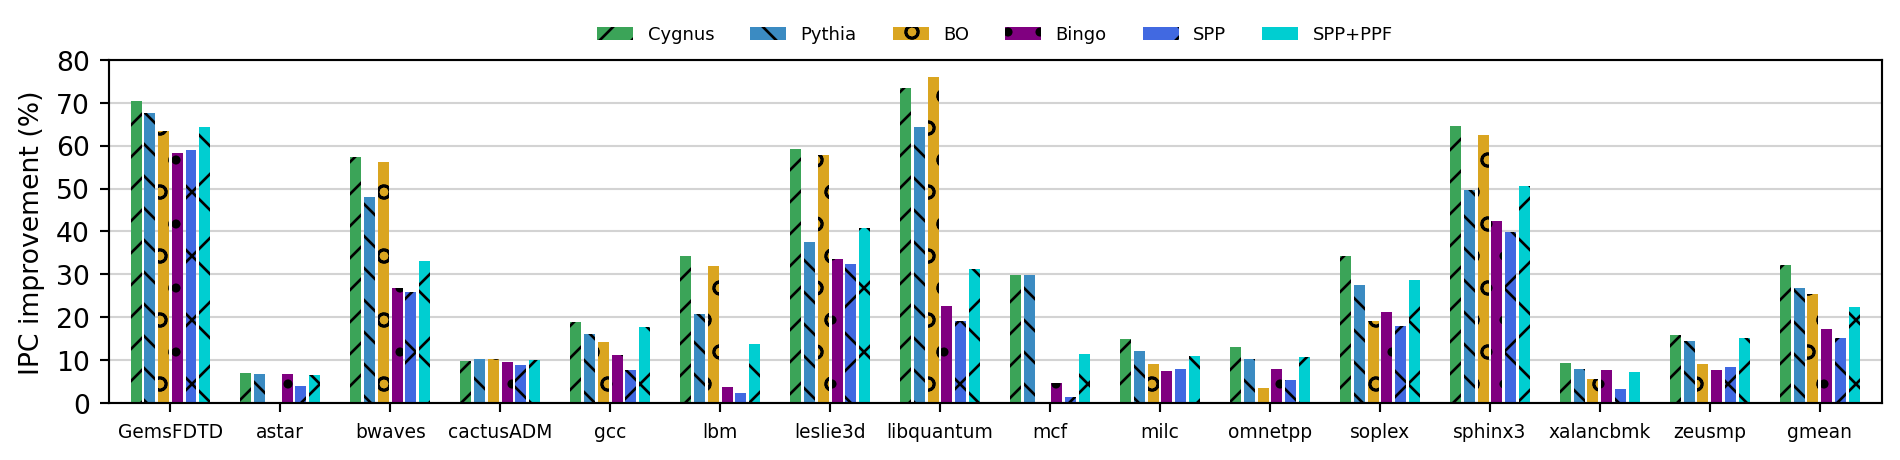

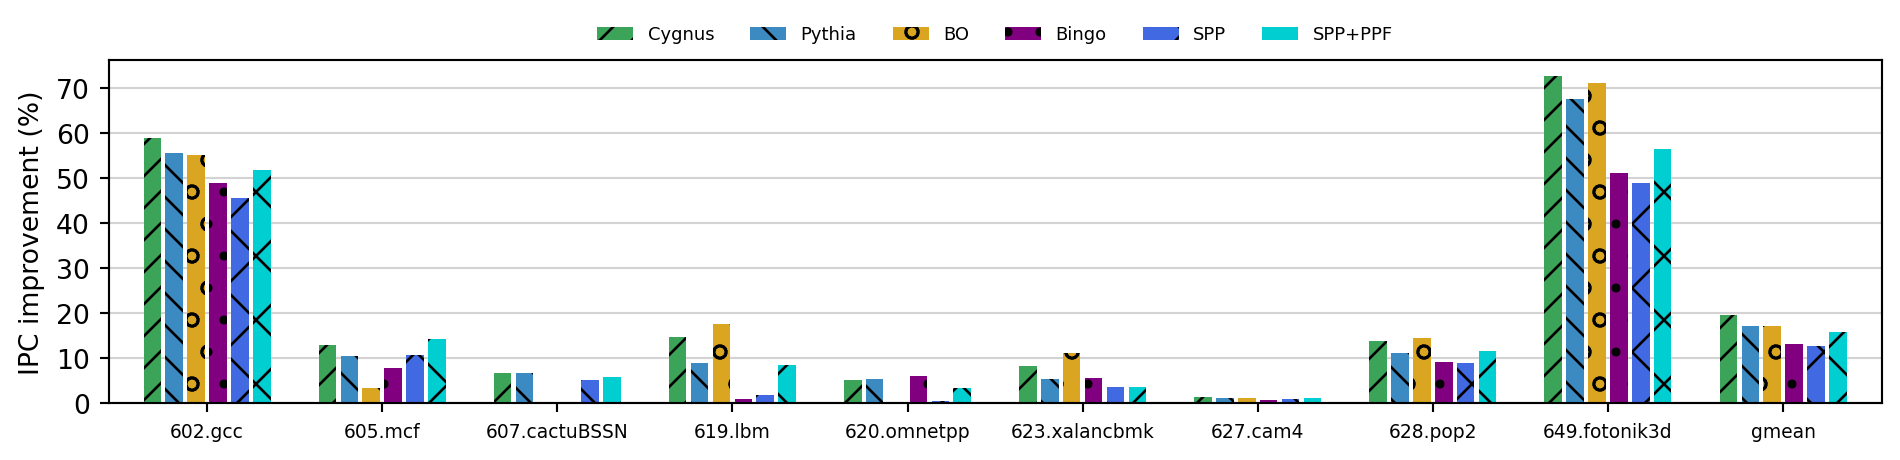

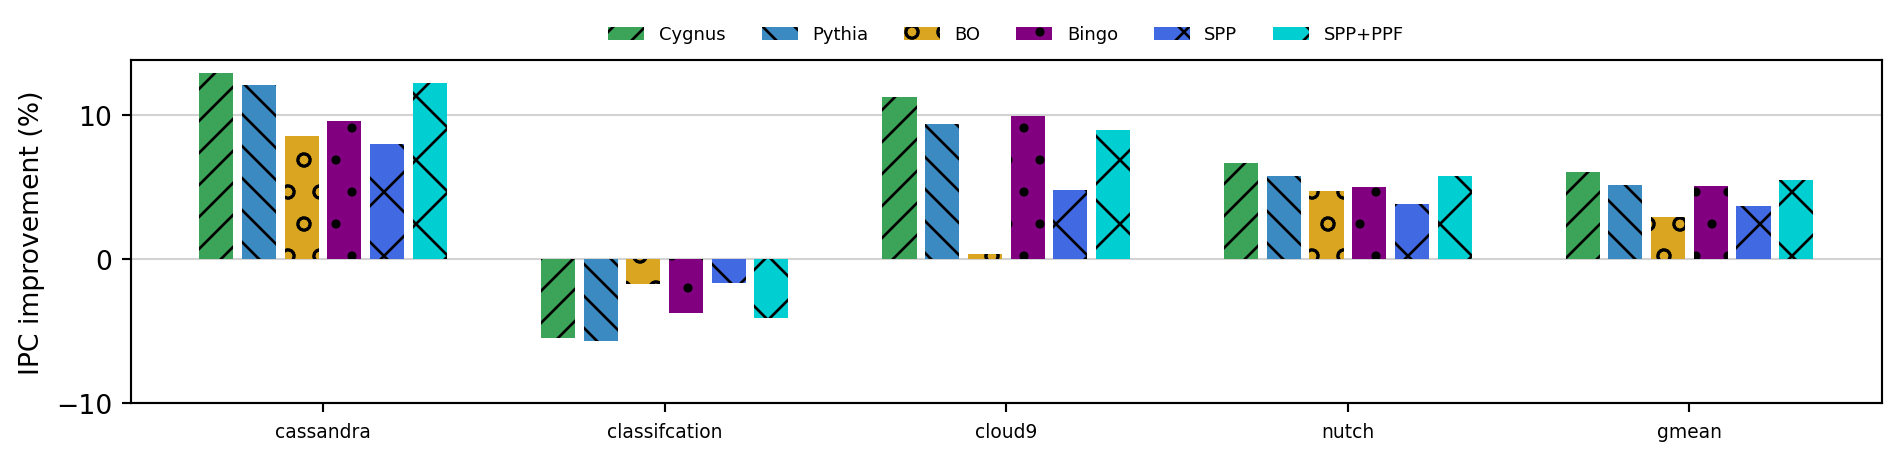

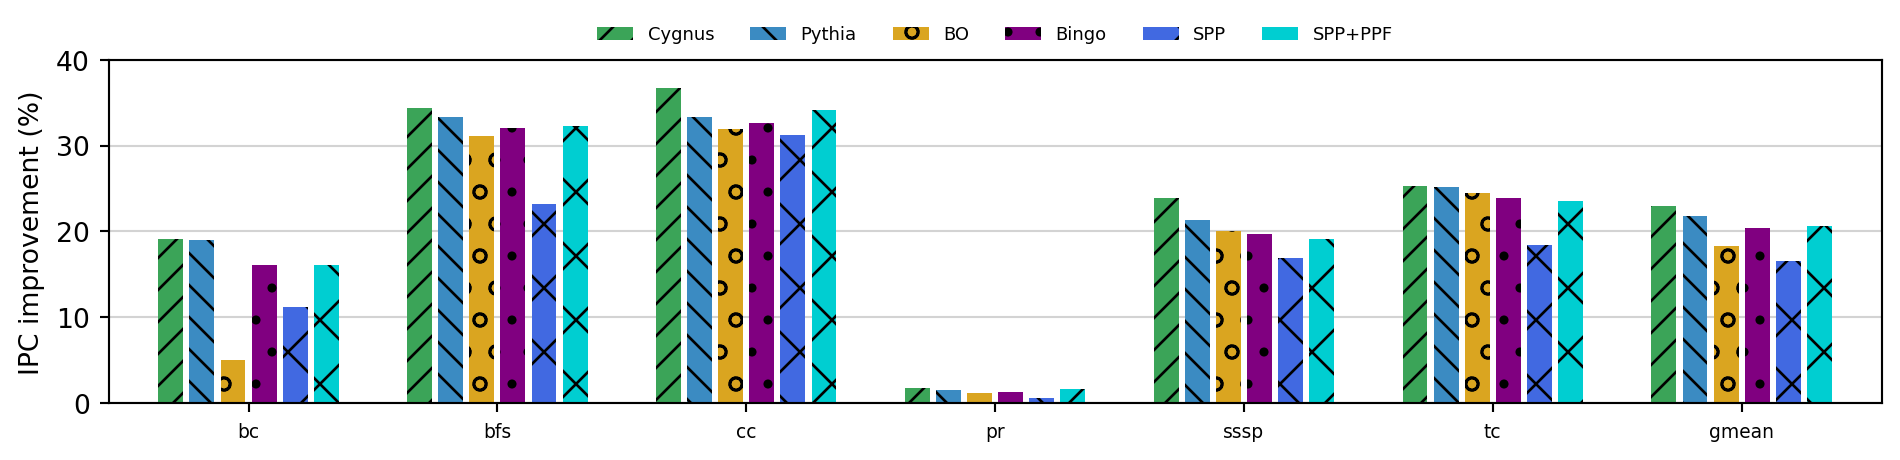

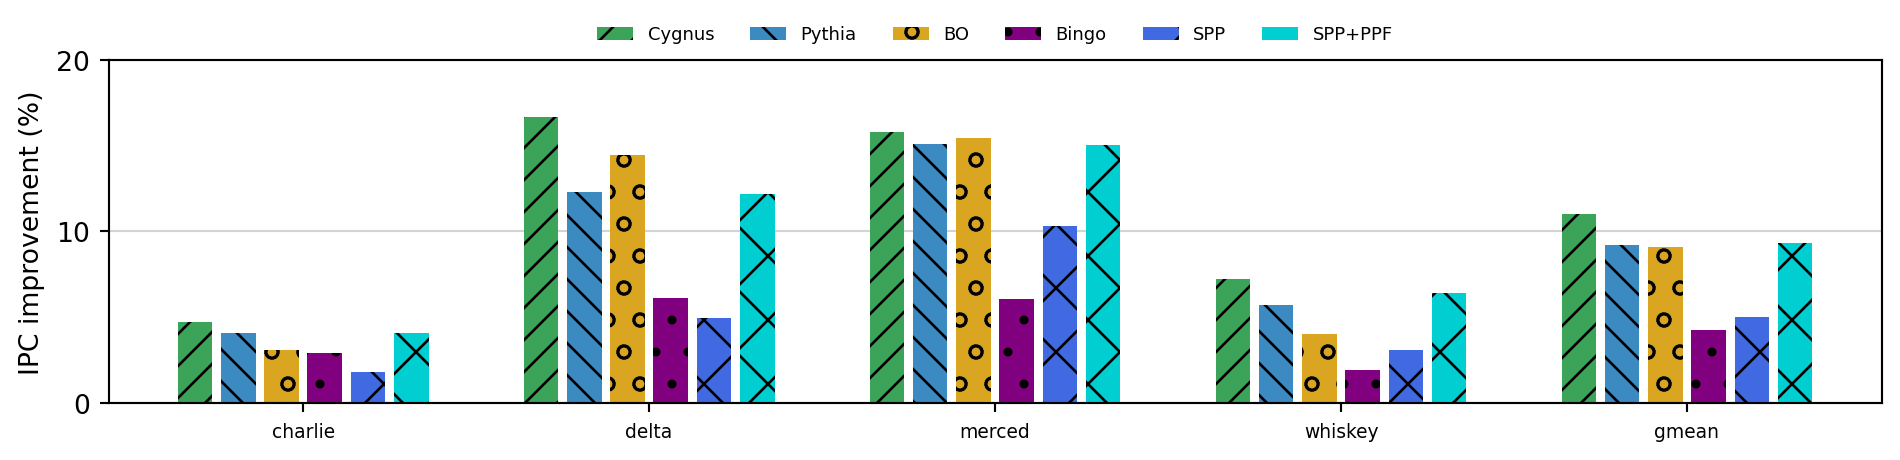

In [ ]:
plots.plot_everything(degree1_1core_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=degree1_1core_colors,
                      hatches=degree1_1core_hatches,
                      legend_kwargs=degree1_1core_legend_kwargs,
                      label_kwargs=degree1_1core_label_kwargs,
                      add_suptitle=False,
                      add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ytick_distance=10,
                      dpi=192, figsize=(10, 2.5))

### Accuracy

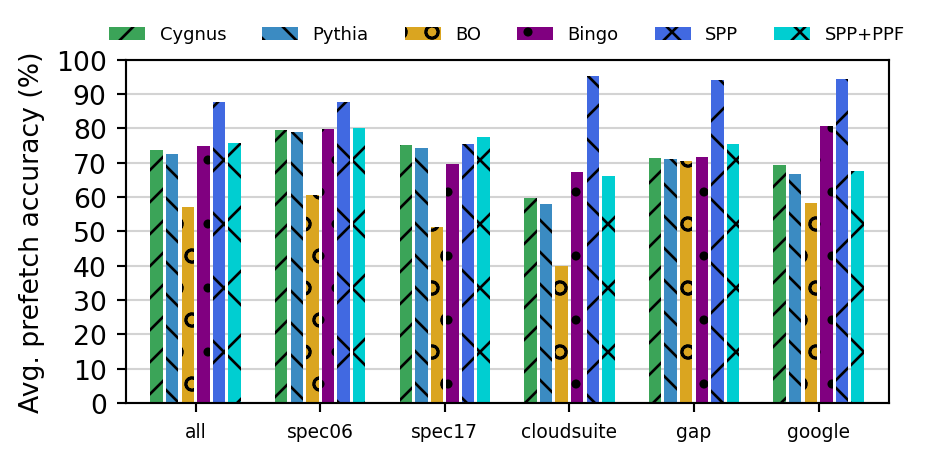

In [ ]:
reload(plots)
plots.plot_metric_means(degree1_1core_df, suites=suites, metric='L2C_accuracy',
                        colors=degree1_1core_colors,
                        hatches=degree1_1core_hatches,
                        legend_kwargs=degree1_1core_legend_kwargs,
                        label_kwargs=degree1_1core_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='Avg. prefetch accuracy (%)',
                        ylim=(0, 100),
                        ytick_distance=10,
                        dpi=192, figsize=(5, 2.5))

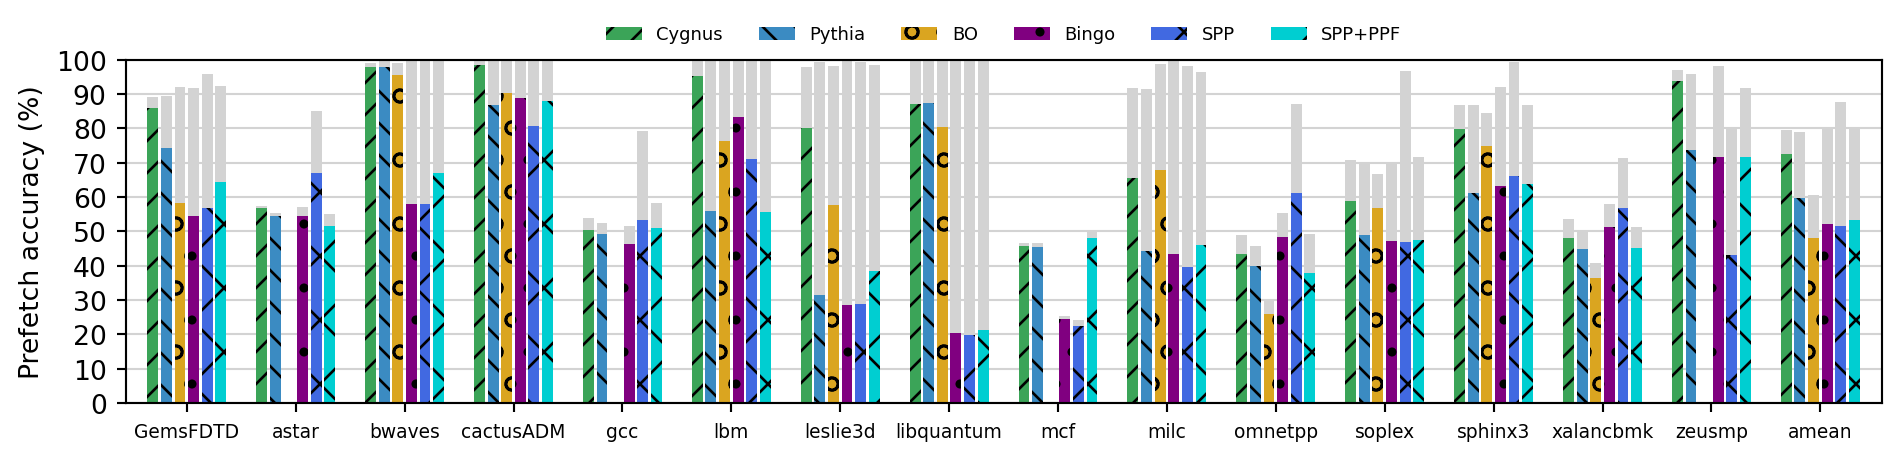

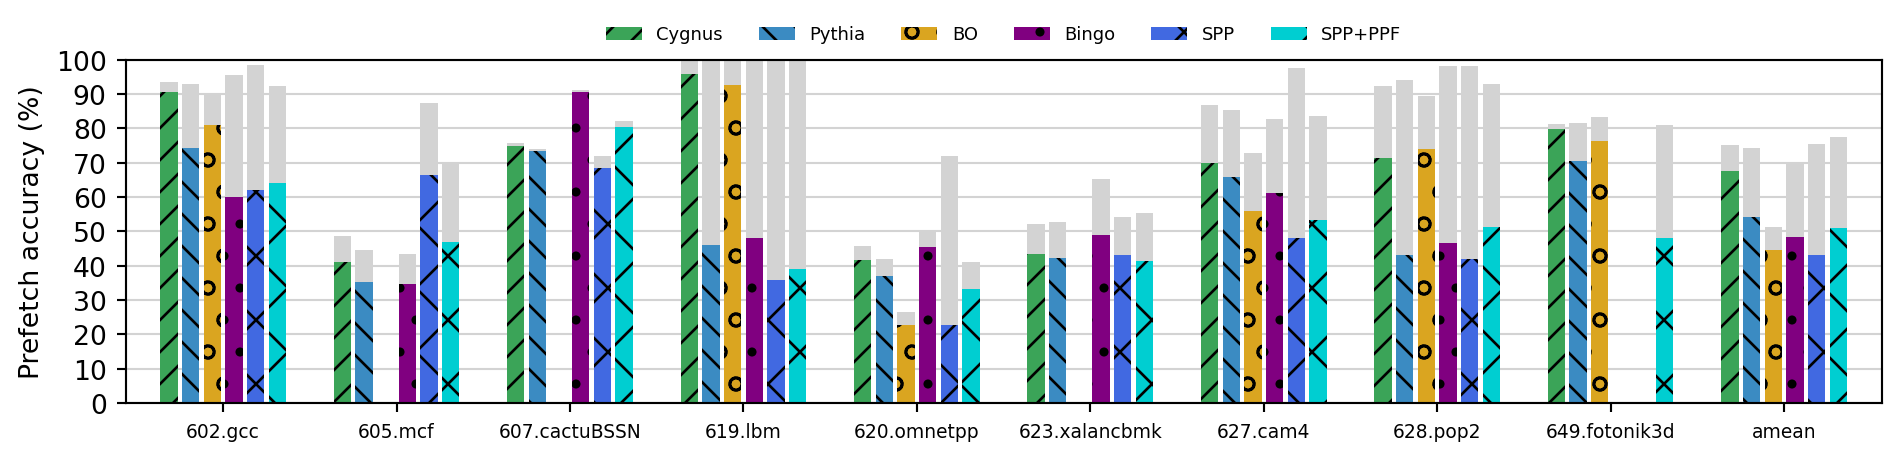

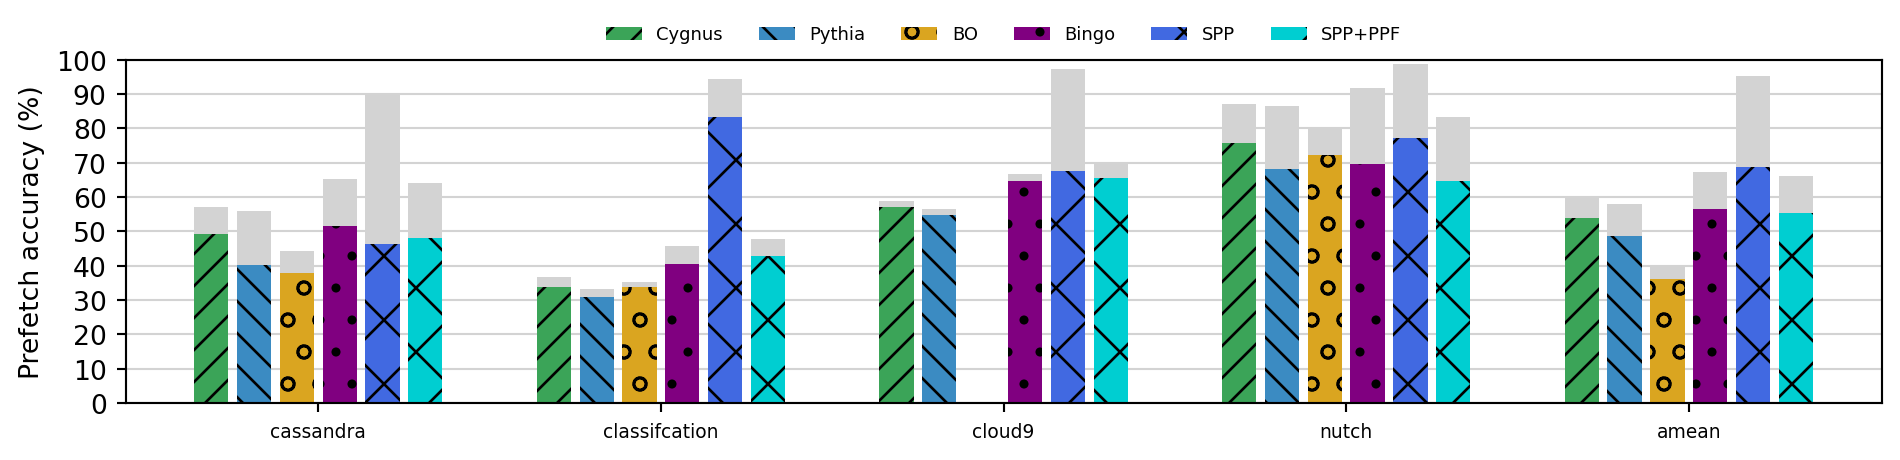

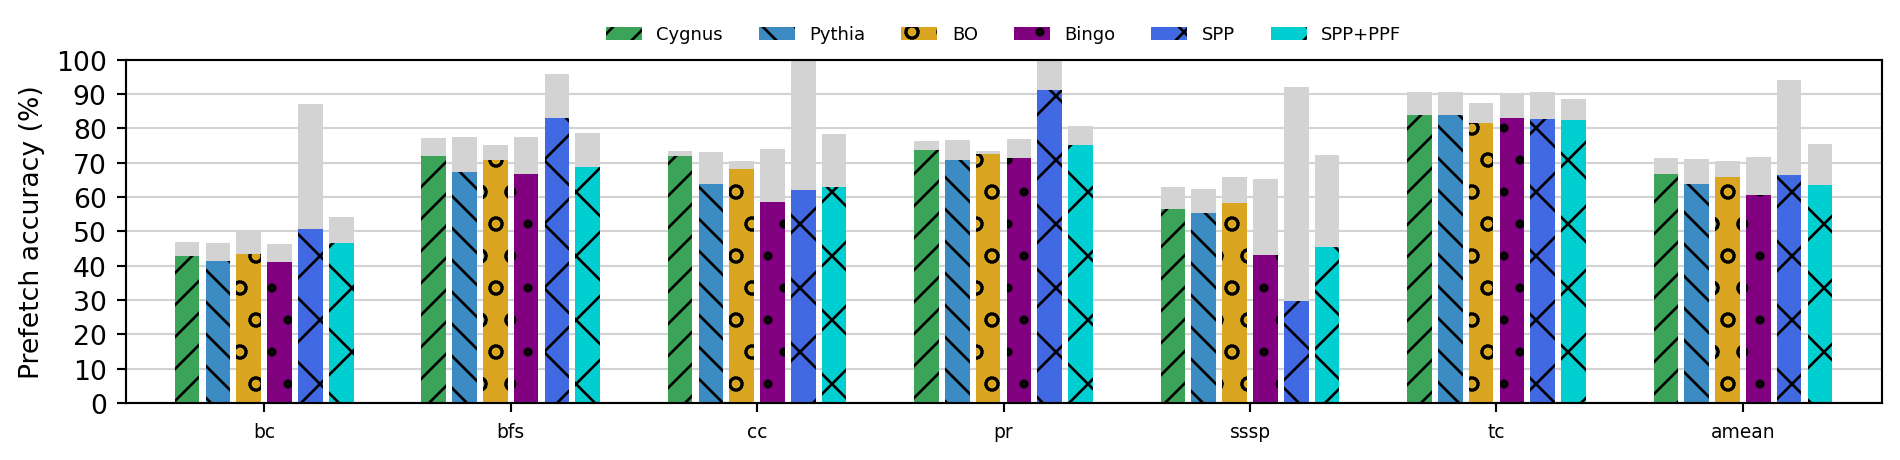

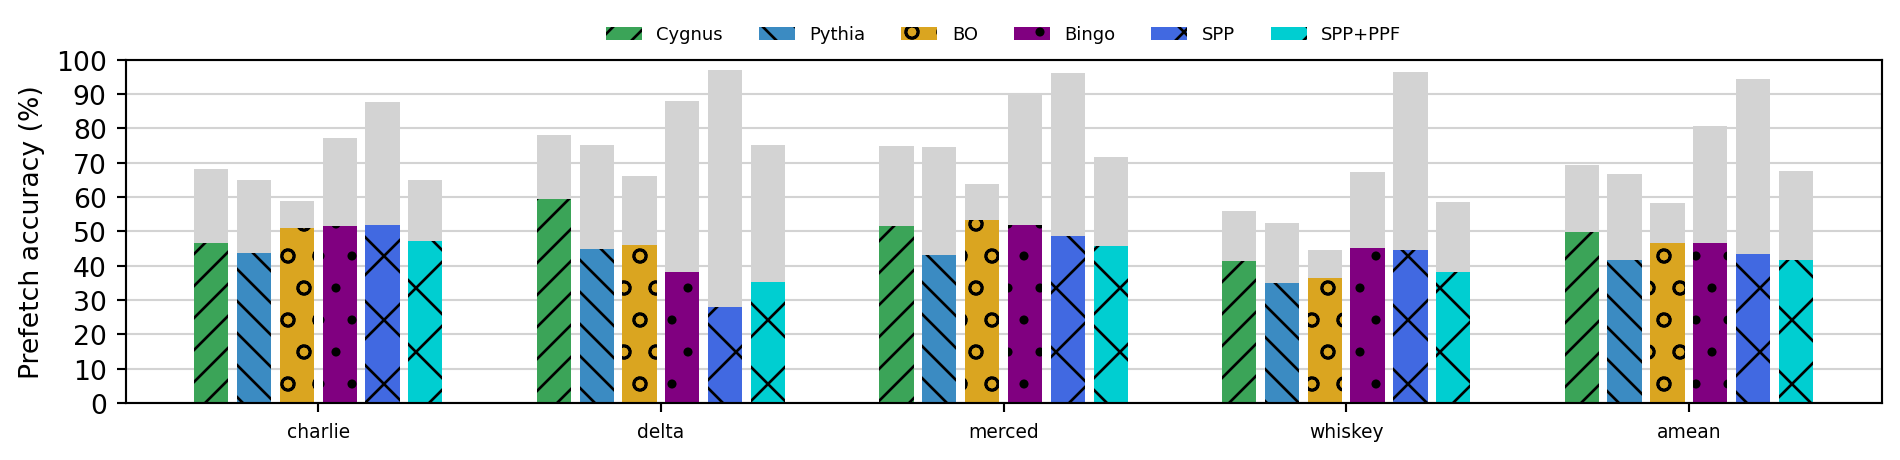

In [ ]:
plots.plot_everything_accuracy(degree1_1core_df, suites=suites, level='L2C', 
                               colors=degree1_1core_colors,
                               hatches=degree1_1core_hatches,
                               legend_kwargs=degree1_1core_legend_kwargs,
                               label_kwargs=degree1_1core_label_kwargs,
                               add_suptitle=False,
                               add_xlabel=False,
                               ylabel='Prefetch accuracy (%)',
                               ytick_distance=10,
                               dpi=192, figsize=(10, 2.5))

### Coverage

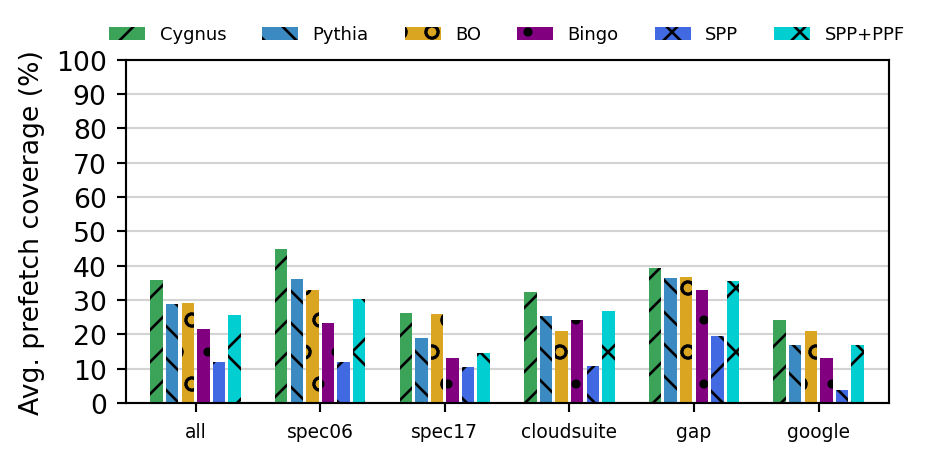

In [ ]:
reload(plots)
plots.plot_metric_means(degree1_1core_df, suites=suites, metric='L2C_coverage',
                        colors=degree1_1core_colors,
                        hatches=degree1_1core_hatches,
                        legend_kwargs=degree1_1core_legend_kwargs,
                        label_kwargs=degree1_1core_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='Avg. prefetch coverage (%)',
                        ylim=(0, 100),
                        ytick_distance=10,
                        dpi=192, figsize=(5, 2.5))

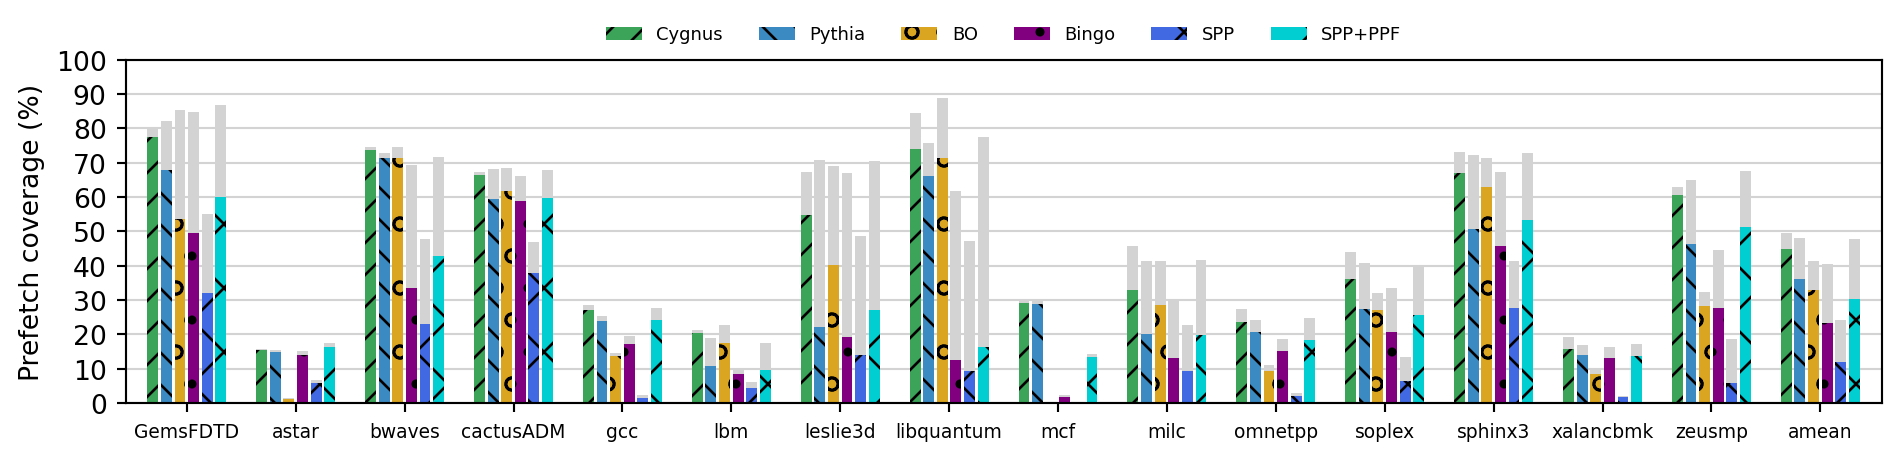

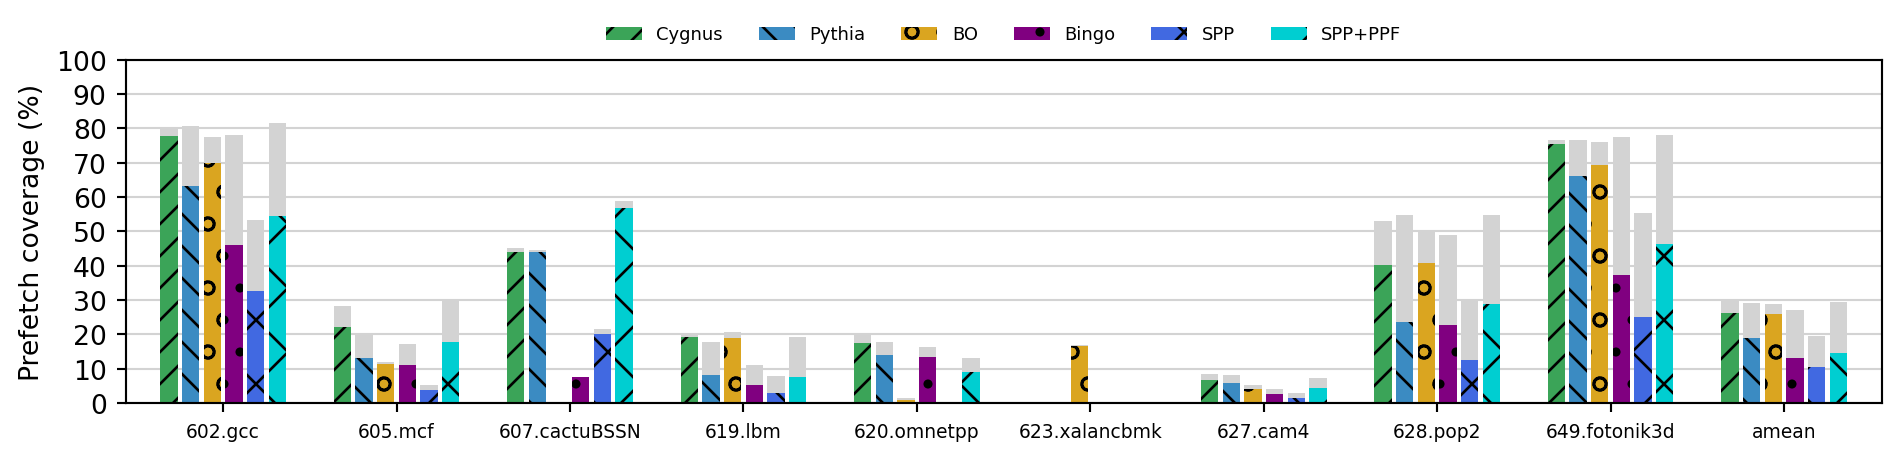

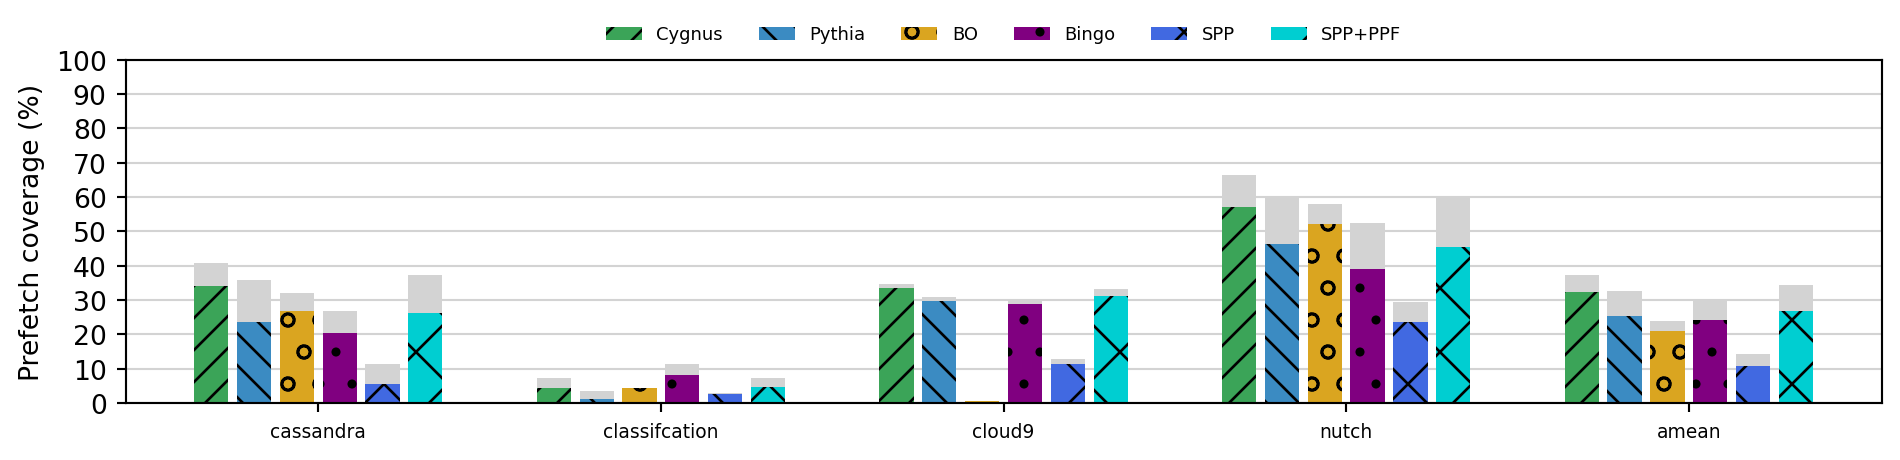

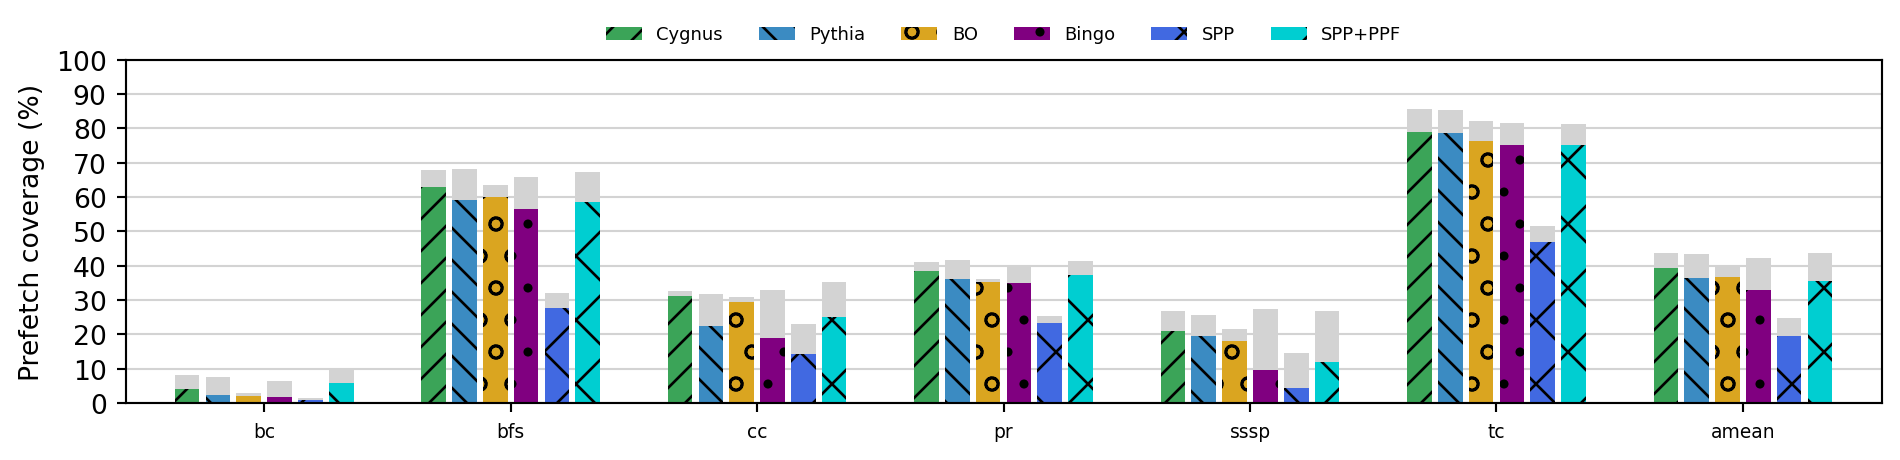

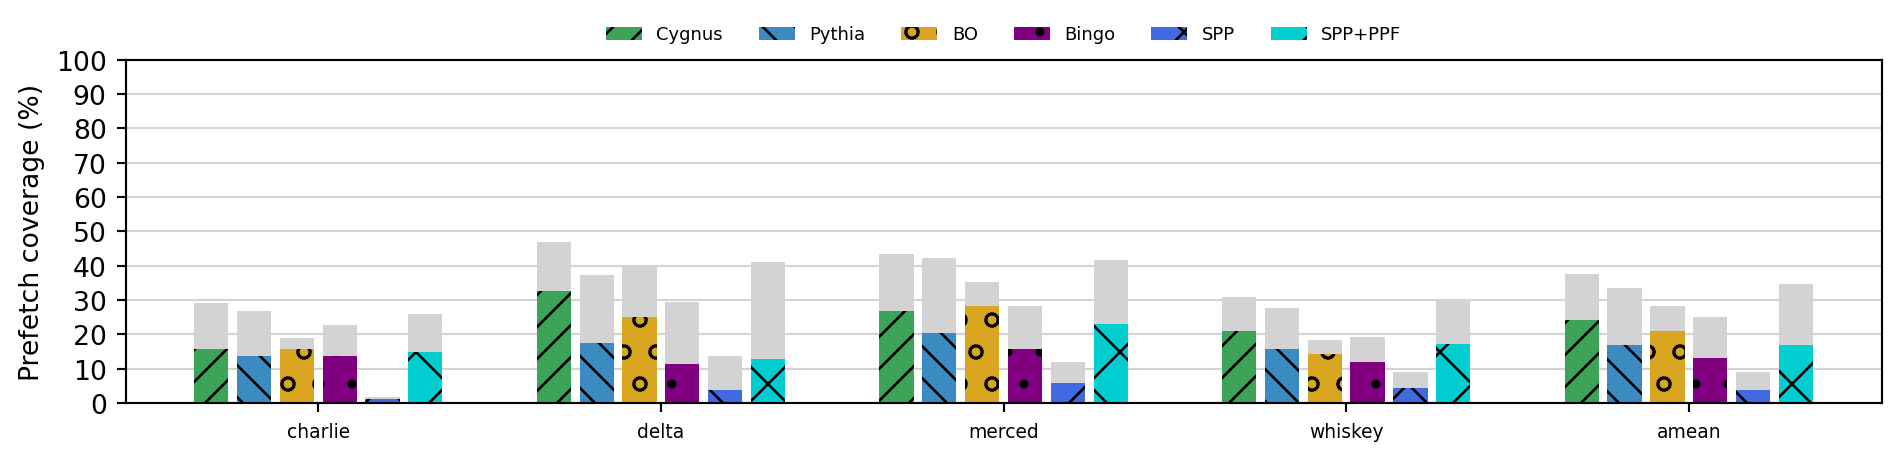

In [ ]:
plots.plot_everything_coverage(degree1_1core_df, suites=suites, level='L2C', 
                               colors=degree1_1core_colors,
                               hatches=degree1_1core_hatches,
                               legend_kwargs=degree1_1core_legend_kwargs,
                               label_kwargs=degree1_1core_label_kwargs,
                               add_suptitle=False,
                               add_xlabel=False,
                               ylabel='Prefetch coverage (%)',
                               ytick_distance=10,
                               dpi=192, figsize=(10, 2.5))

## Dynamic degree

In [6]:
degreedyn_1core_df = {
    'Cygnus': dfs['degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio']['Delta_Path, PC_Delta'],
    'Cygnus Depth': dfs['degreedyn/cygnus/bwaware3_ignorequeued']['Delta_Path, PC_Delta'],
    #'Cygnus Depth': dfs['degreedyn/cygnus/bwaware3']['Delta_Path, PC_Delta'],
    #'Cygnus': dfs['degreedyn/cygnus/bwaware3_width_moreactions_real']['Delta_Path, PC_Delta'],
    #'Cygnus MSHRAware': dfs['degreedyn/cygnus/bwaware3_width_moreactions_real_mshraware']['Delta_Path, PC_Delta'],
    #'Cygnus ActionPrio': dfs['degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio']['Delta_Path, PC_Delta'],
    #'Cygnus ActionPrio Max8': dfs['degreedyn/cygnus/bwaware3_width_moreactions_real_actionprio_max8']['Delta_Path, PC_Delta'],
    #'Cygnus Ideal': dfs['degreedyn/cygnus/bwaware3_width_moreactions_ideal']['Delta_Path, PC_Delta'],

    #'Pythia +Ignore': dfs['degreedyn/cygnus/bwaware3_pythialike_ignorequeued']['Delta_Path, PC_Delta'],
    #'Pythia-Width': dfs['degreedyn/cygnus/bwaware3_pythialike_width_moreactions']['Delta_Path, PC_Delta'],
    'Pythia': dfs['degreedyn/pythia/bwaware3']['Delta_Path, PC_Delta'],

    'Bingo': dfs['degreedyn/baseline']['bingo'],
    'SMS': dfs['degreedyn/baseline']['sms'],
    'SPP': dfs['degreedyn/baseline']['spp_dev2'],
    'SPP+PPF' : dfs['degreedyn/baseline']['spp_ppf_dev'],
    'MLOP': dfs['degreedyn/baseline']['mlop'],
    'DSPatch': dfs['degreedyn/baseline']['dspatch'],
    'BO-Width': dfs['degreedyn/bo/dynwidth/score16_fallback']['bo'],
}
degreedyn_1core_colors = defaultdict(lambda: None, {
    'Cygnus':       colormaps['Set3'](0), #cmaps['Cygnus-Width'](0.65),
    'Cygnus Depth': colormaps['Set3'](1), #cmaps['Cygnus-Ignore'](0.65),

    'Pythia':       colormaps['Set3'](2), #cmaps['Pythia'](0.65),
    #'Pythia +Ignore':                    #cmaps['Pythia-Ignore'](0.65),
    #'Pythia Width':                      #cmaps['Pythia-Width'](0.5),

    'Bingo':    colormaps['Set3'](3), #'purple',
    'SMS':      colormaps['Set3'](4), #'royalblue',
    'SPP':      colormaps['Set3'](5), #'royalblue',
    'SPP+PPF':  colormaps['Set3'](6), #'darkturquoise',
    'MLOP':     colormaps['Set3'](7), #'deeppink',
    'DSPatch':  colormaps['Set3'](8), #'darkred',
    'BO-Width': colormaps['Set3'](9), #'gold',
})

degreedyn_1core_hatches = defaultdict(lambda: None, {
    # 'Pythia': '\\\\',
    # 'Pythia +Ignore': '\\\\',
    # 'Pythia-Width': '\\\\',

    # 'Cygnus Depth': '//',
    # 'Cygnus': '//',
    # 'Cygnus MSHRAware': '//',
    # 'Cygnus ActionPrio': '//',
    # 'Cygnus ActionPrio Max8': '//',
    # 'Cygnus Ideal': '//',
    
    # 'Bingo': '..',
    # 'MLOP': '-',
    # 'SPP': 'x',
    # 'SPP+PPF': 'x',
    # 'BO-Width': 'o',
})

degreedyn_1core_legend_kwargs = {
    'ncol': 4,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_legend_kwargs_wide = {
    'ncol': 8,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

### IPC improvement

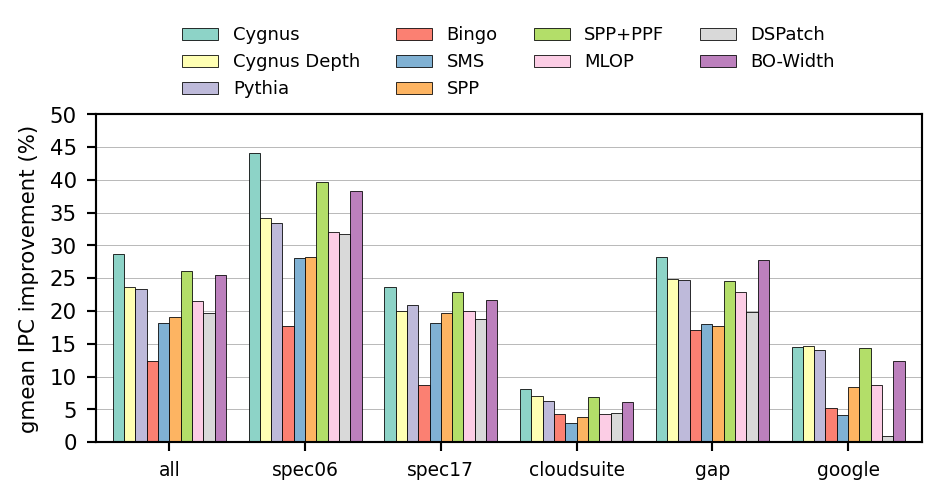

In [7]:
reload(plots)
plots.plot_metric_means(degreedyn_1core_df, suites=suites, metric='ipc_improvement',
                        colors=degreedyn_1core_colors,
                        hatches=degreedyn_1core_hatches,
                        legend_kwargs=degreedyn_1core_legend_kwargs,
                        label_kwargs=degreedyn_1core_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='gmean IPC improvement (%)',
                        ylim=(0, 50),
                        ytick_distance=5,
                        dpi=192, figsize=(5, 2.7))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


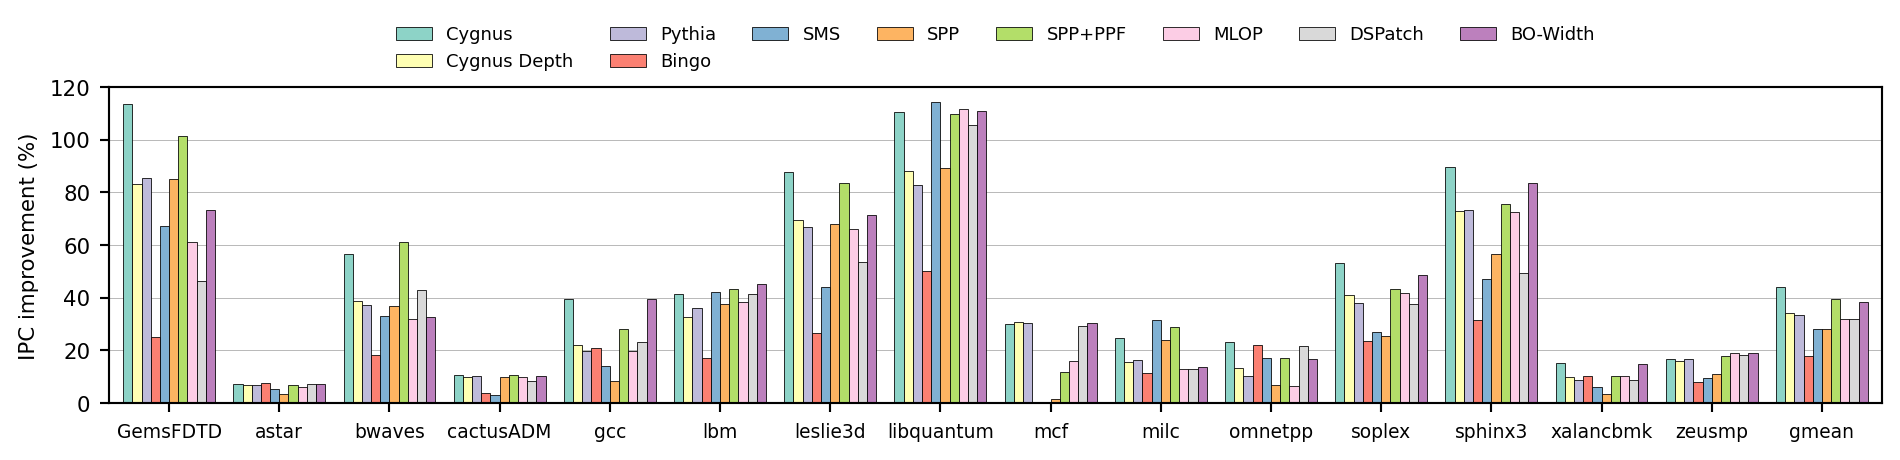

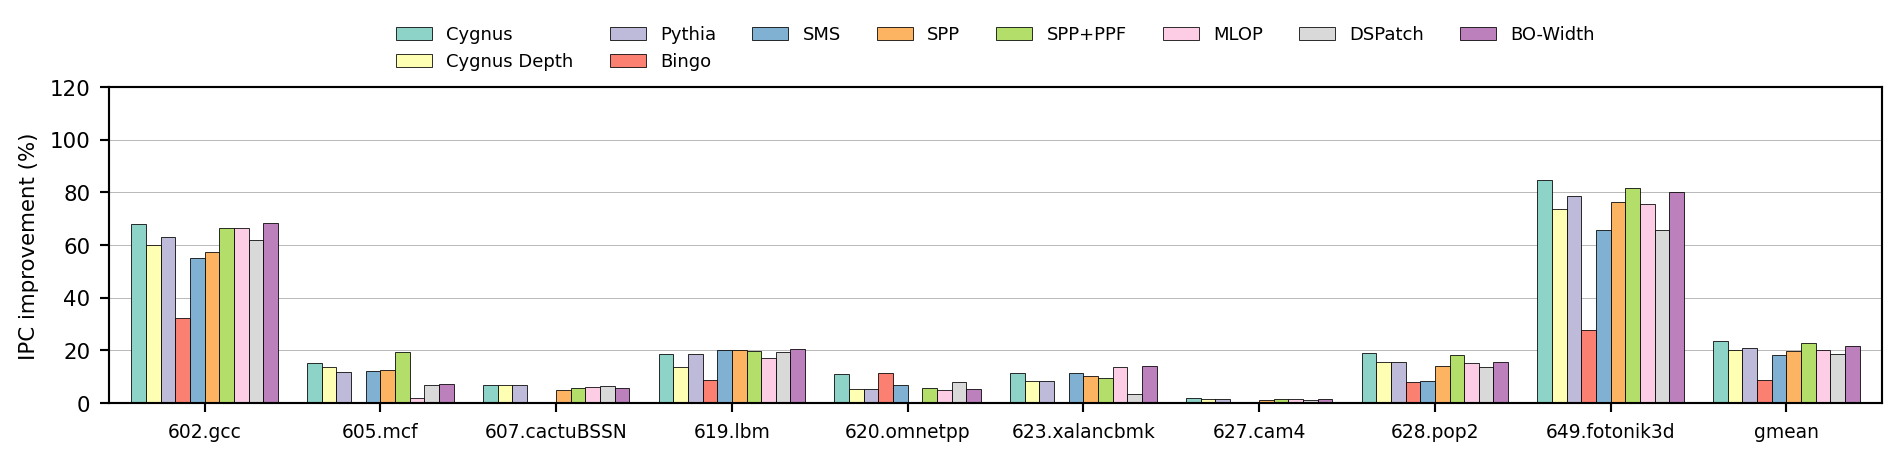

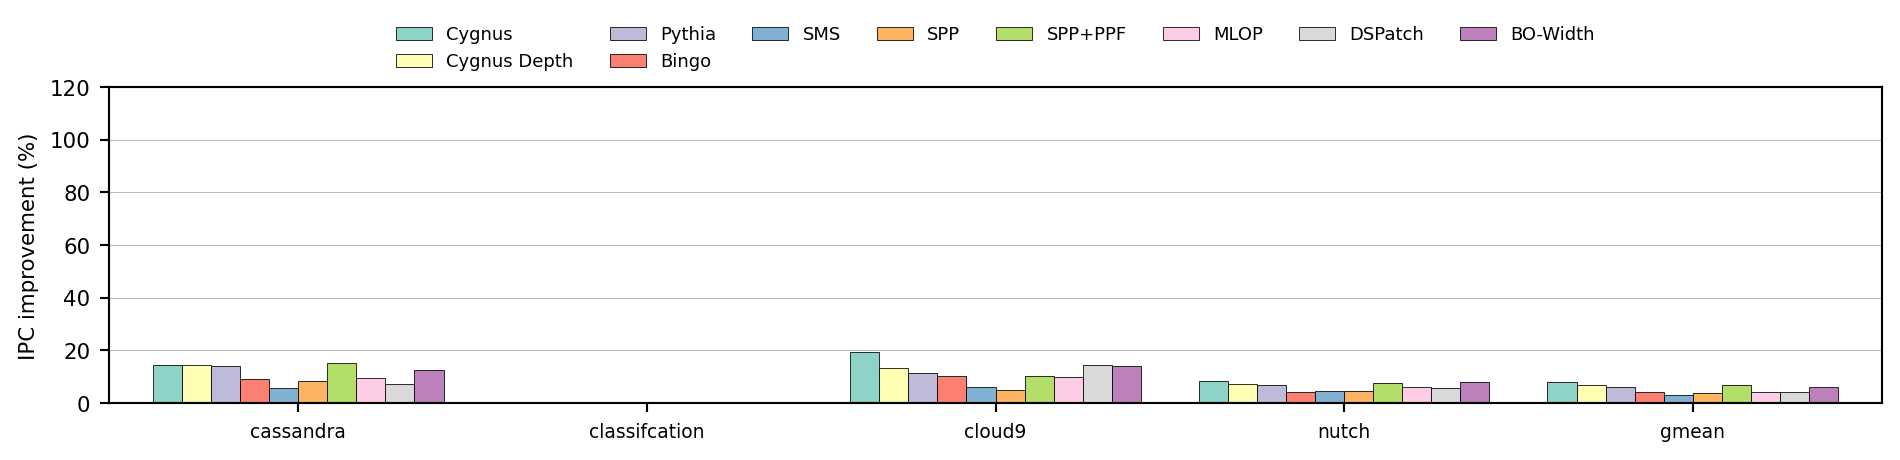

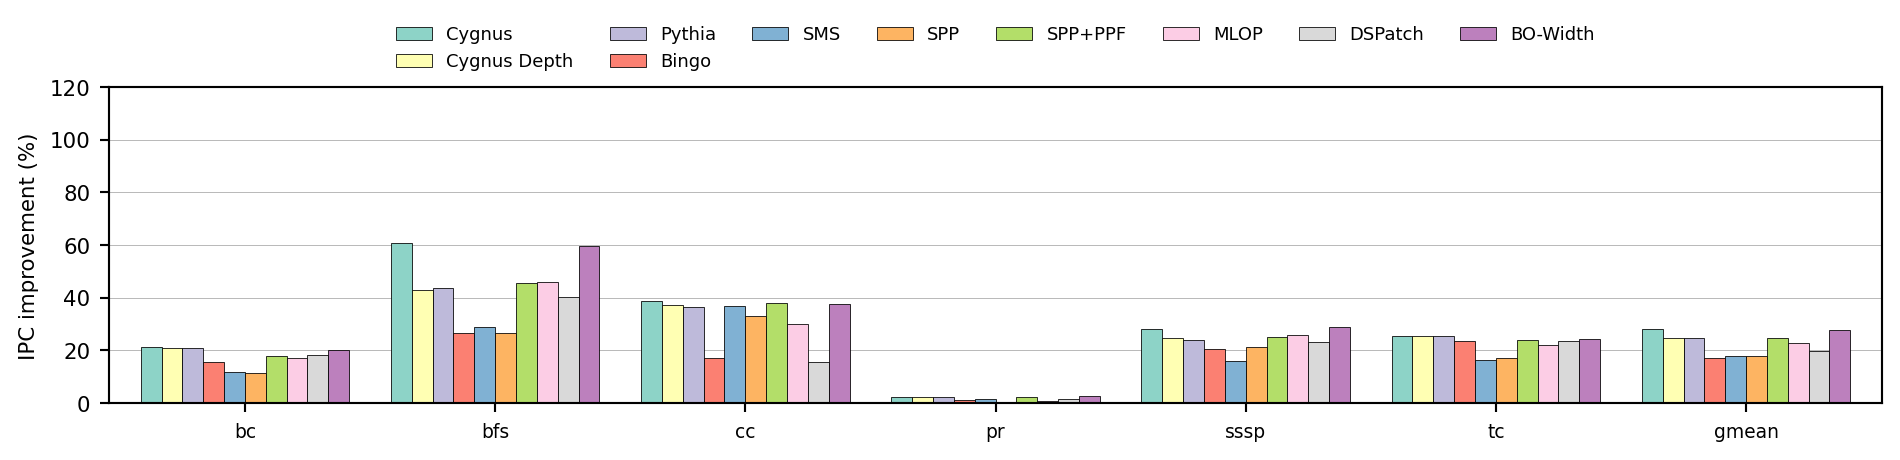

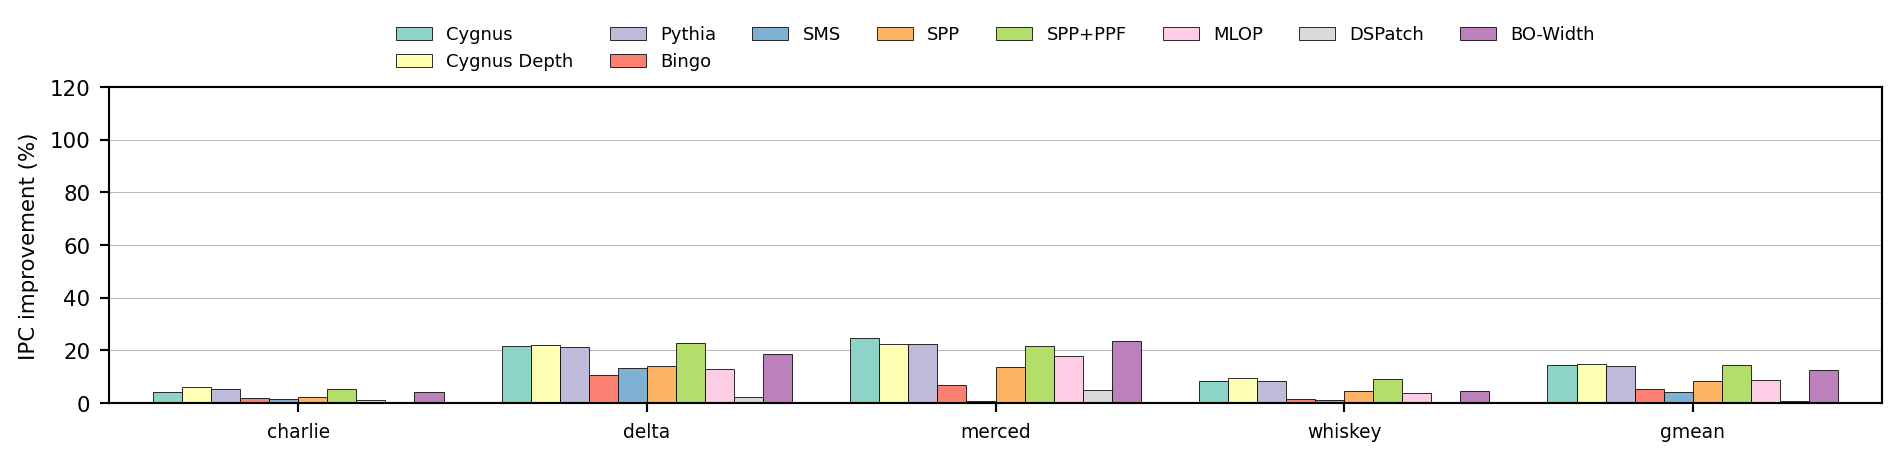

In [ ]:
reload(plots)
plots.plot_everything(degreedyn_1core_df, suites=suites, metrics=['ipc_improvement'], 
                      colors=degreedyn_1core_colors,
                      hatches=degreedyn_1core_hatches,
                      legend_kwargs=degreedyn_1core_legend_kwargs_wide,
                      label_kwargs=degreedyn_1core_label_kwargs,
                      add_suptitle=False,
                      add_xlabel=False,
                      ylabel='IPC improvement (%)',
                      ylim=(0, 120),
                      ytick_distance=20,
                      dpi=192, figsize=(10, 2.5))

### Accuracy

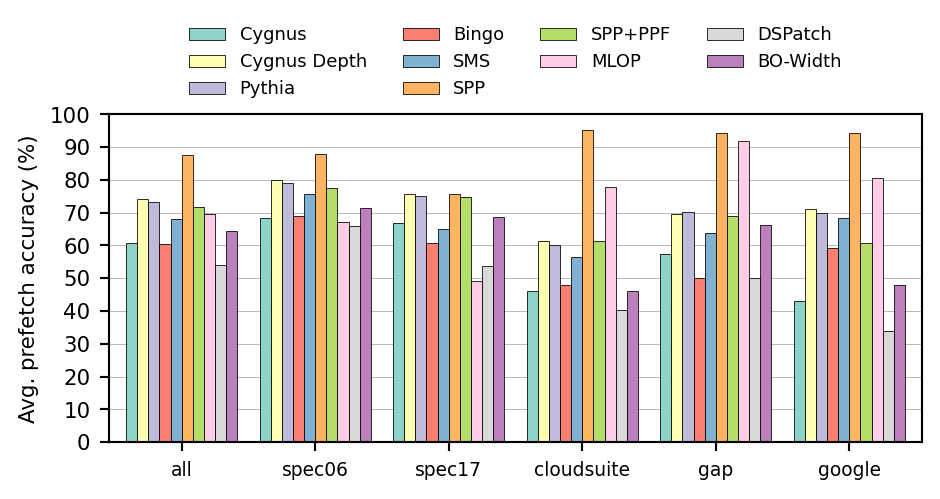

In [8]:
reload(plots)
plots.plot_metric_means(degreedyn_1core_df, suites=suites, metric='L2C_accuracy',
                        colors=degreedyn_1core_colors,
                        hatches=degreedyn_1core_hatches,
                        legend_kwargs=degreedyn_1core_legend_kwargs,
                        label_kwargs=degreedyn_1core_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='Avg. prefetch accuracy (%)',
                        ylim=(0, 100),
                        ytick_distance=10,
                        dpi=192, figsize=(5, 2.7))

=== spec06 weighted ===


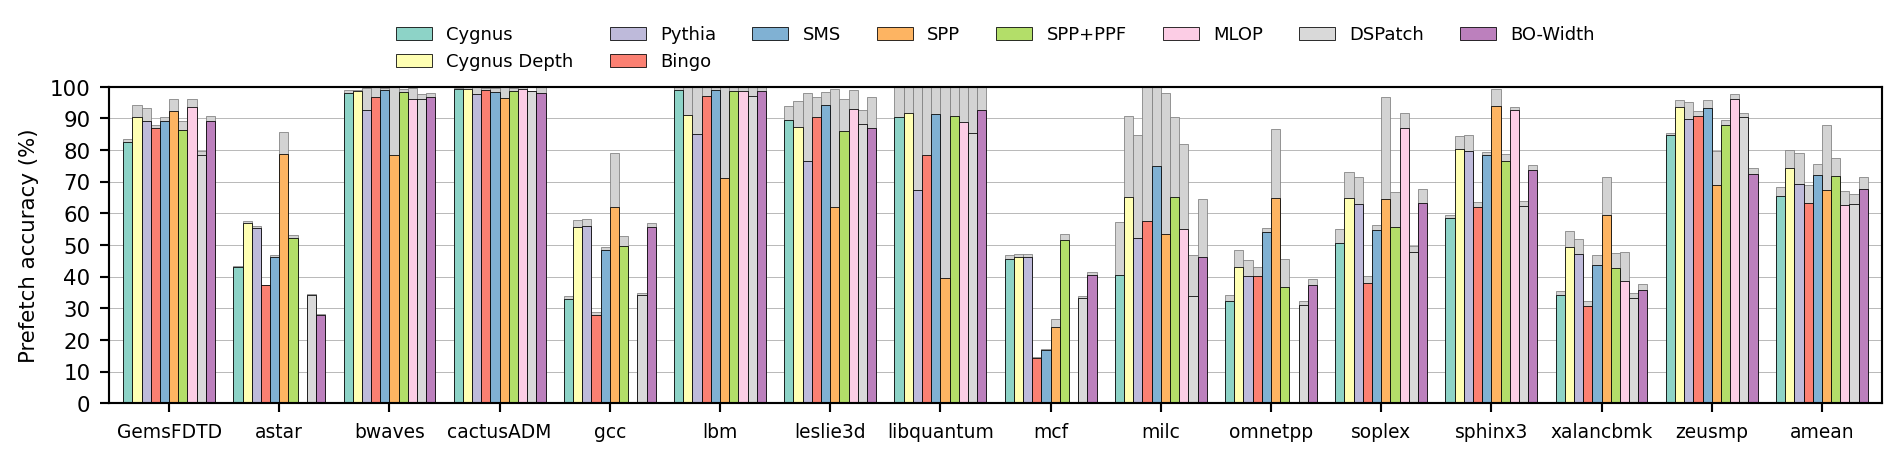

=== spec17 weighted ===


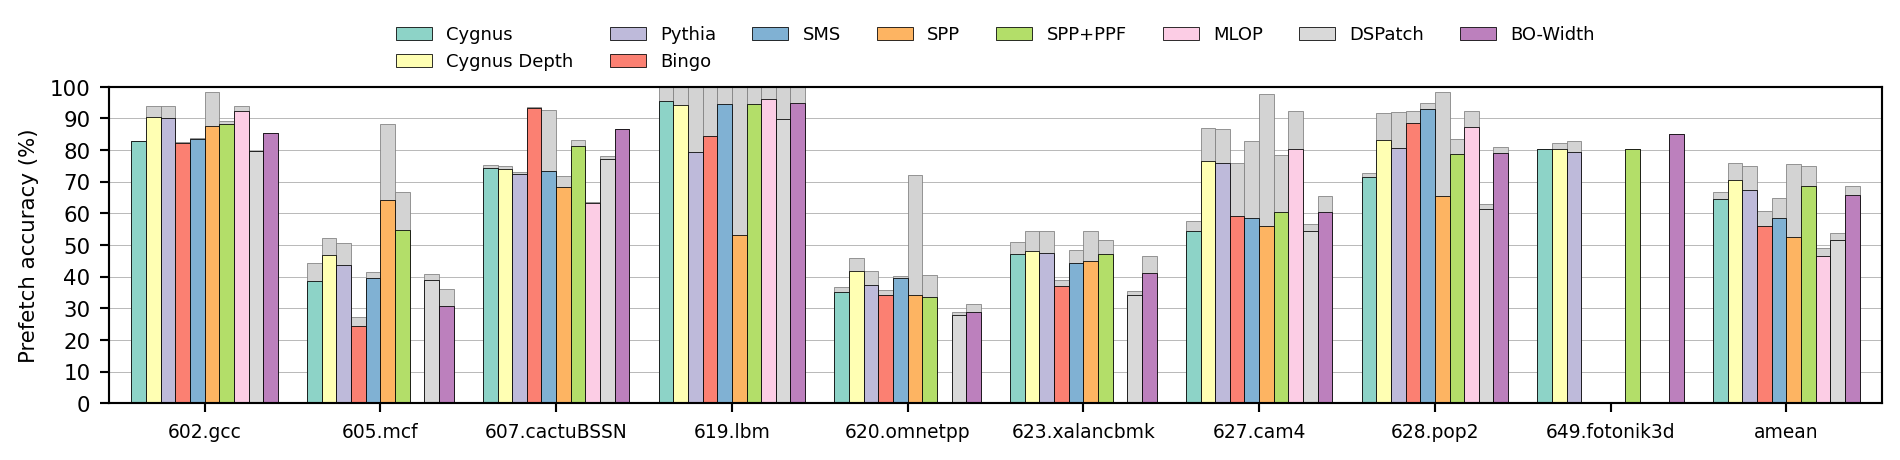

=== cloudsuite weighted ===


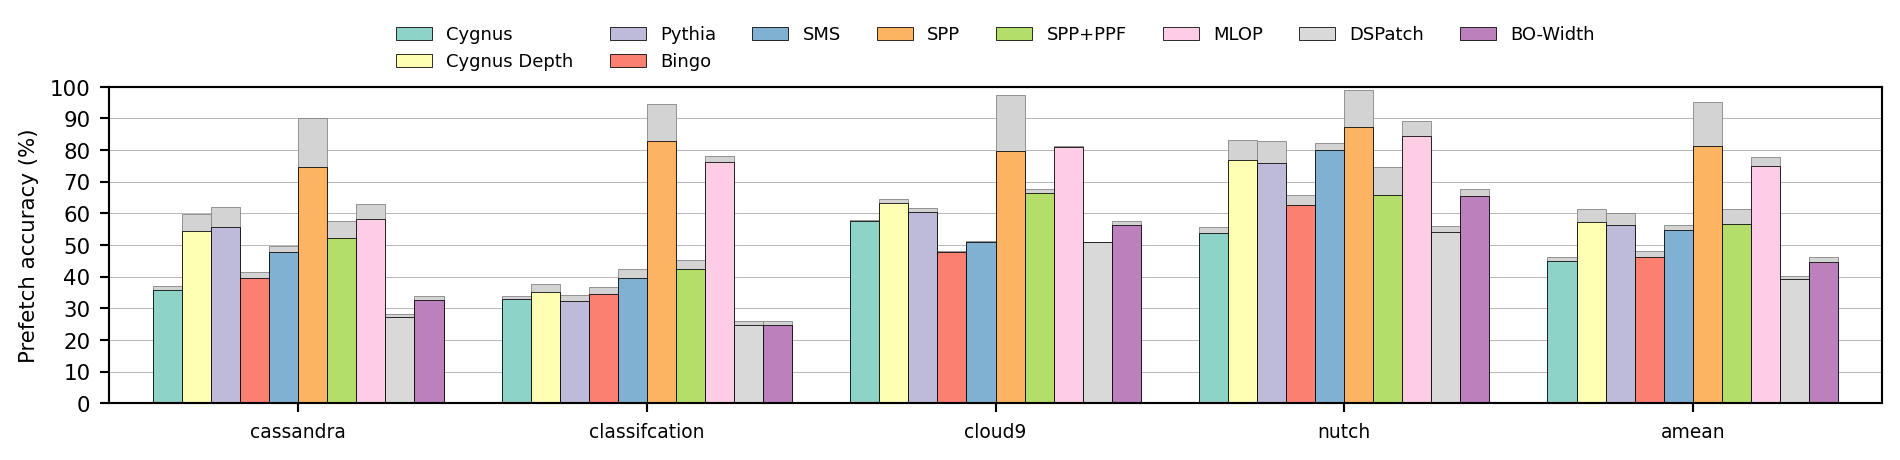

=== gap one_phase ===


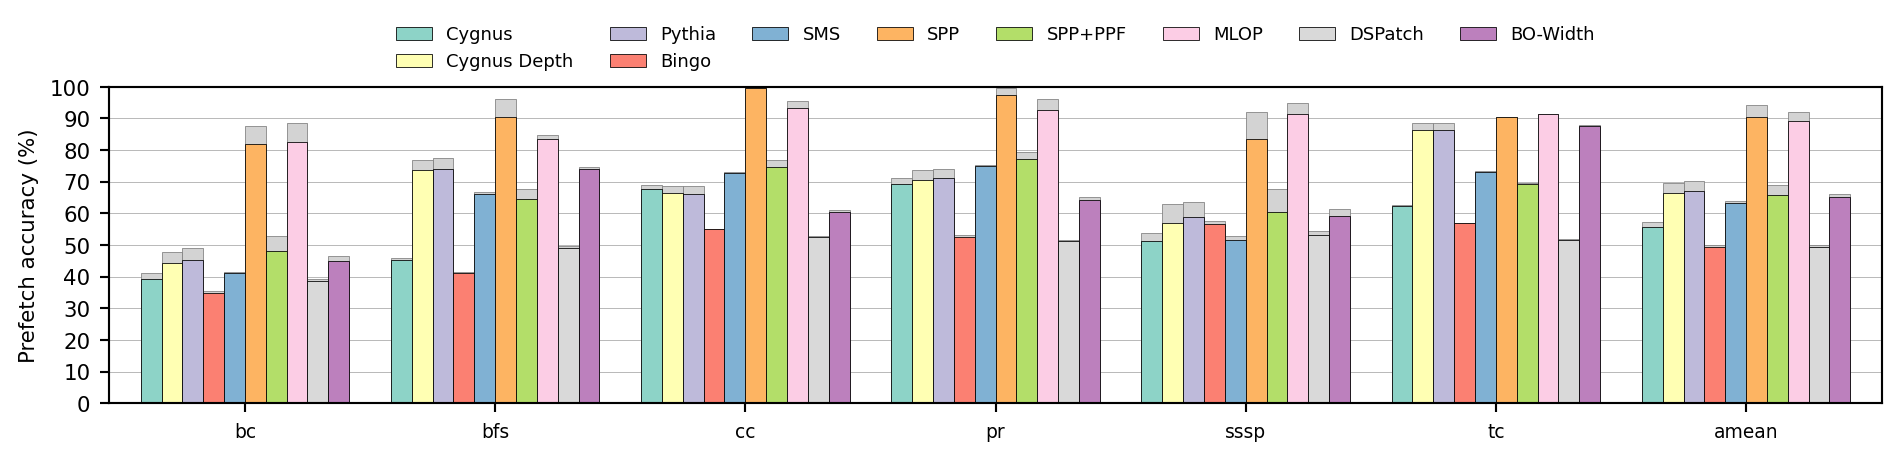

=== google one_phase ===


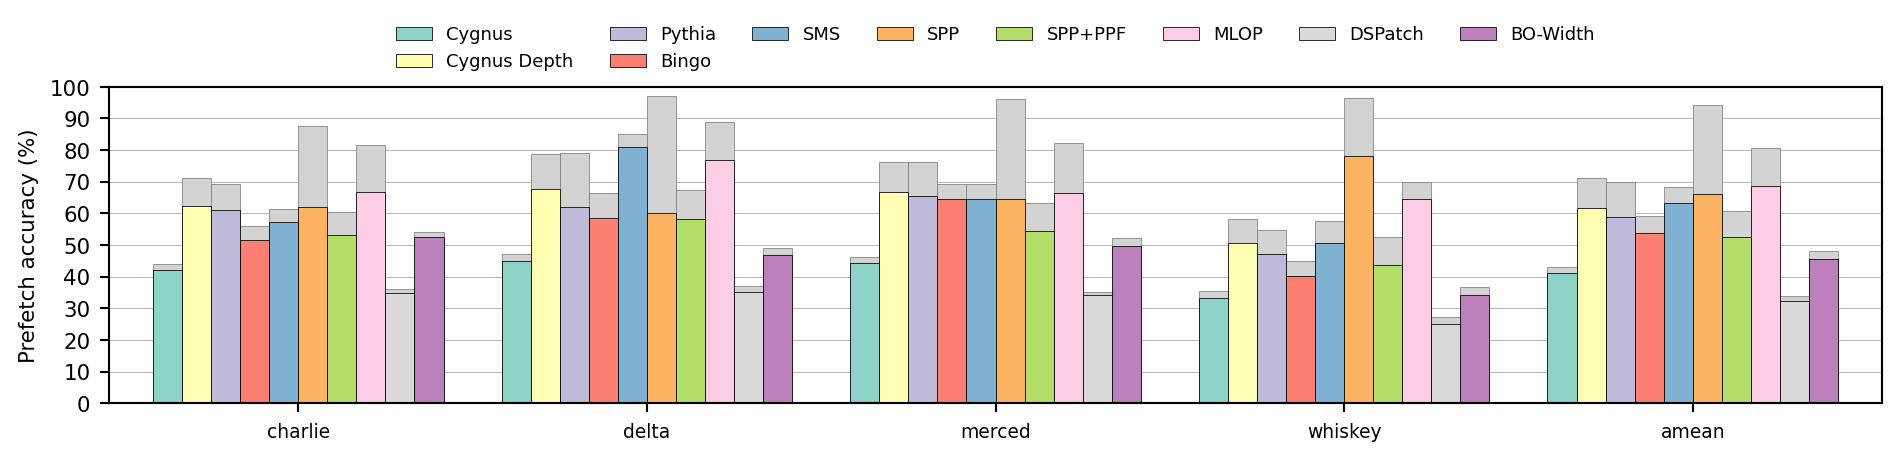

In [9]:
reload(plots)
plots.plot_everything_accuracy(degreedyn_1core_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_colors,
                               hatches=degreedyn_1core_hatches,
                               legend_kwargs=degreedyn_1core_legend_kwargs_wide,
                               label_kwargs=degreedyn_1core_label_kwargs,
                               add_suptitle=False,
                               add_xlabel=False,
                               ylabel='Prefetch accuracy (%)',
                               ytick_distance=10,
                               dpi=192, figsize=(10, 2.5))

### Coverage

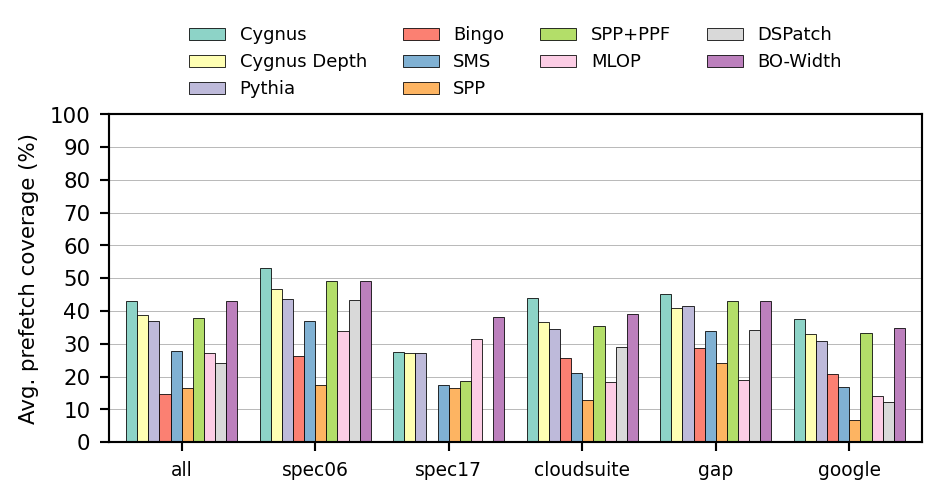

In [10]:
reload(plots)
plots.plot_metric_means(degreedyn_1core_df, suites=suites, metric='L2C_coverage',
                        colors=degreedyn_1core_colors,
                        hatches=degreedyn_1core_hatches,
                        legend_kwargs=degreedyn_1core_legend_kwargs,
                        label_kwargs=degreedyn_1core_label_kwargs,
                        add_suptitle=False,
                        add_xlabel=False,
                        ylabel='Avg. prefetch coverage (%)',
                        ylim=(0, 100),
                        ytick_distance=10,
                        dpi=192, figsize=(5, 2.7))

=== spec06 weighted ===


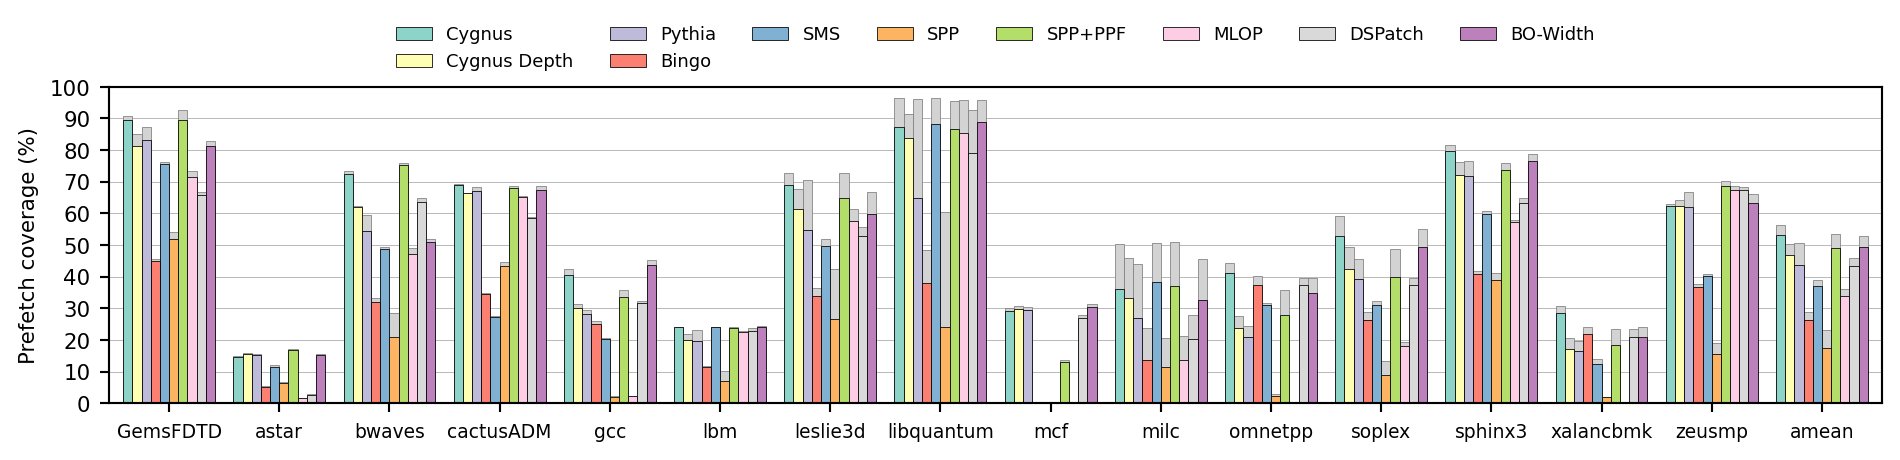

=== spec17 weighted ===


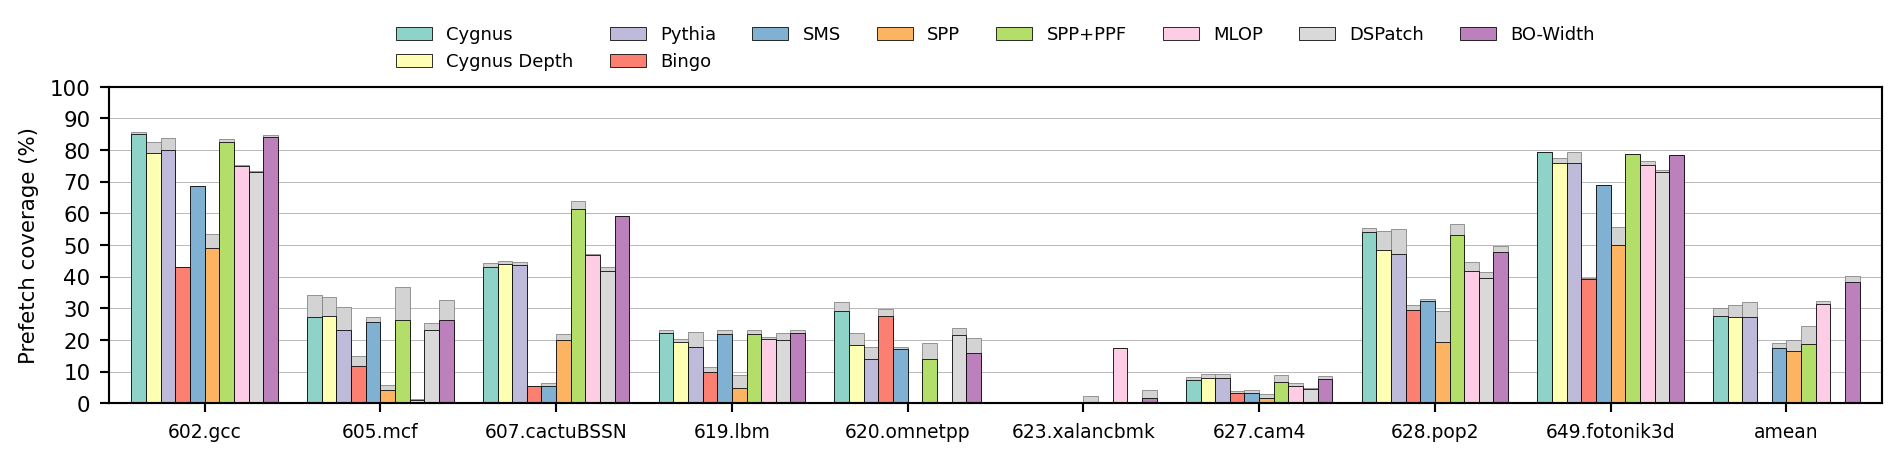

=== cloudsuite weighted ===


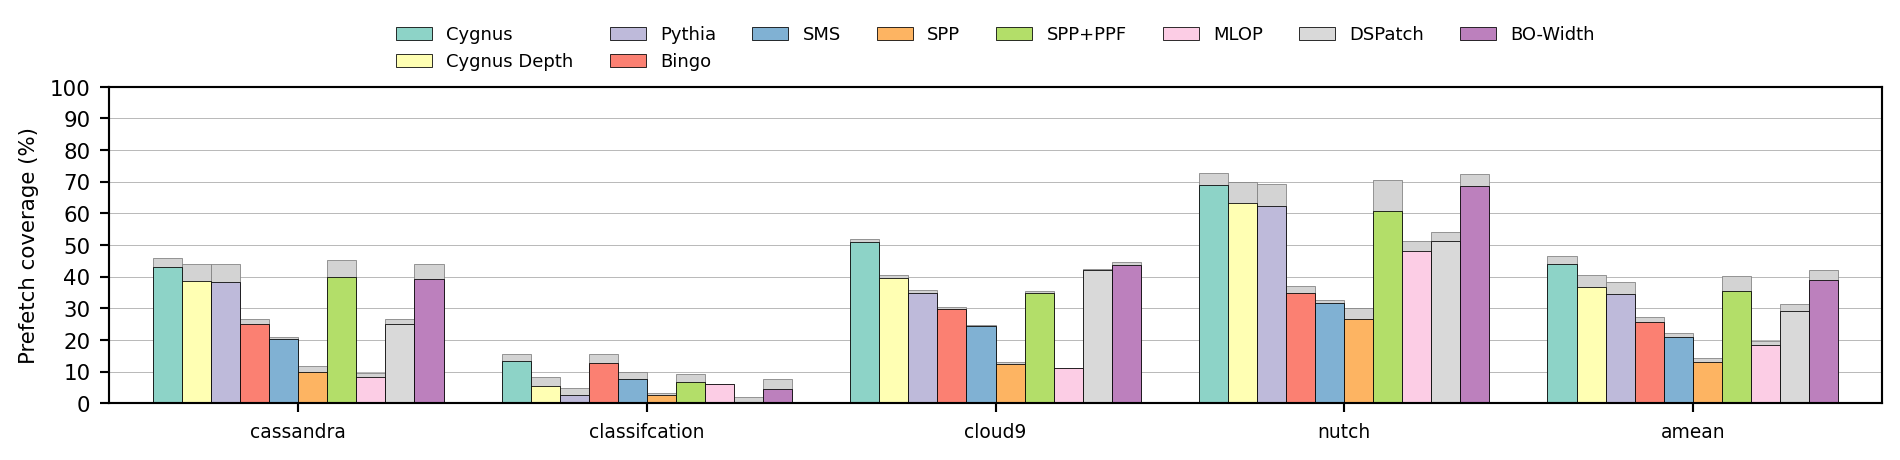

=== gap one_phase ===


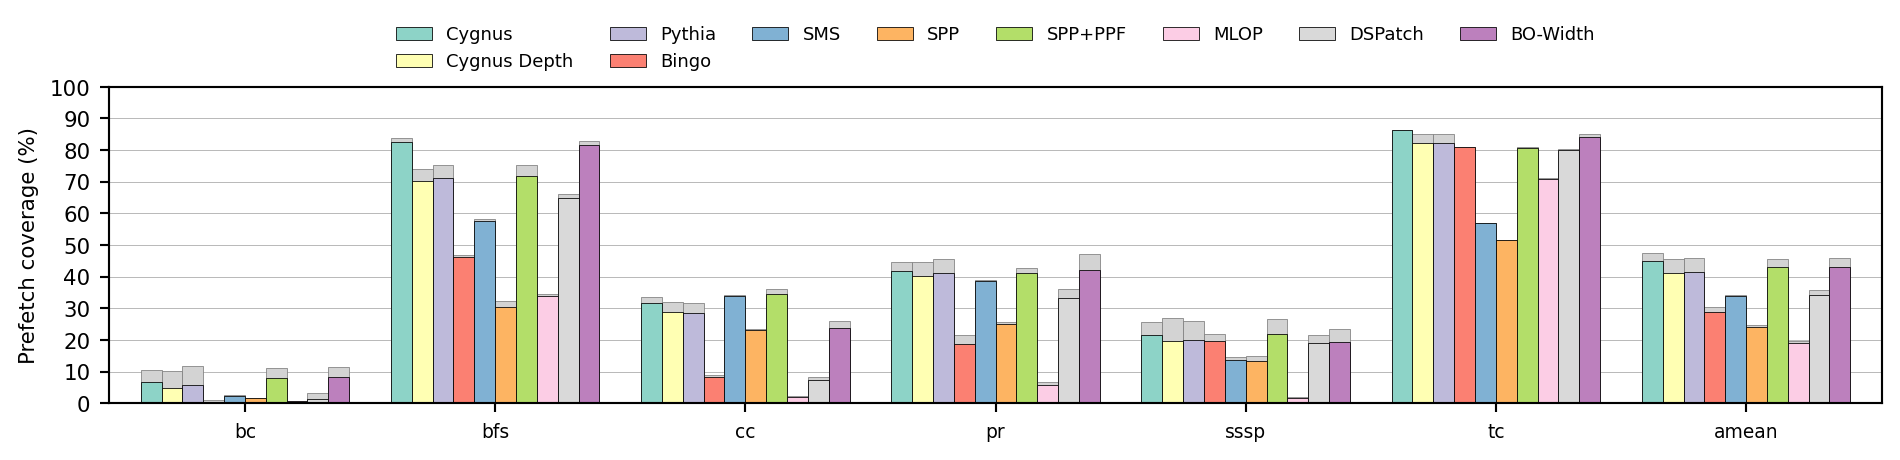

=== google one_phase ===


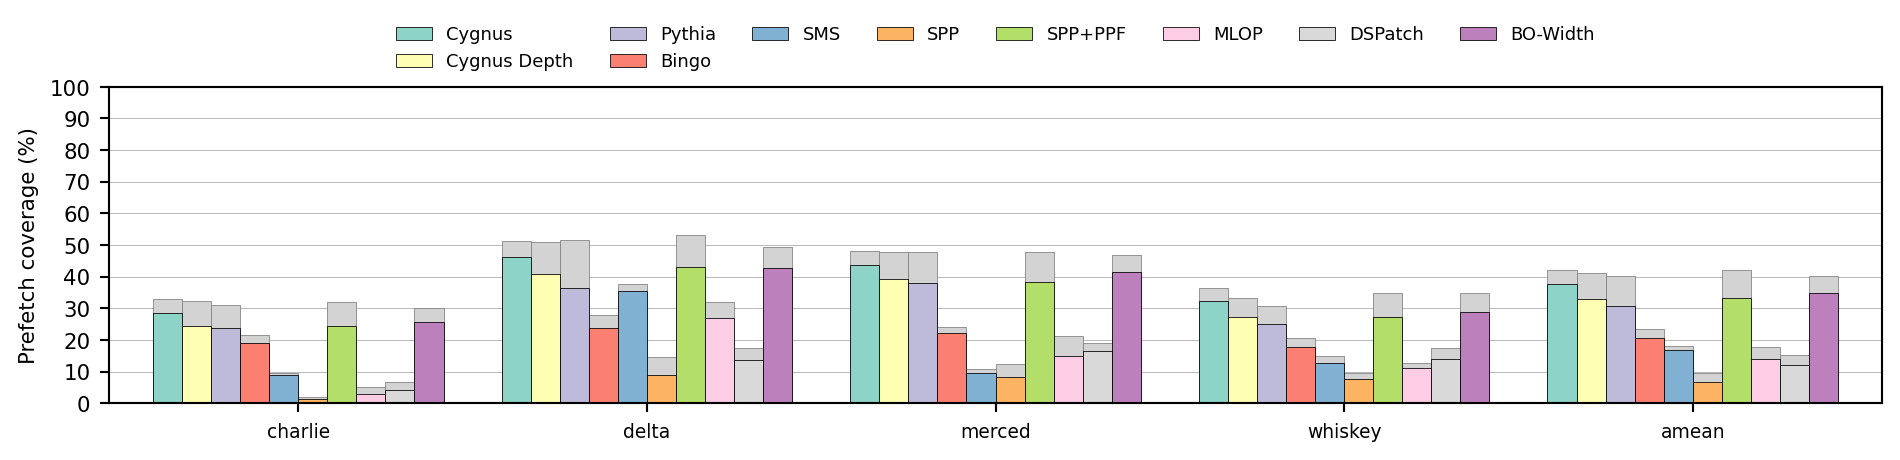

In [11]:
plots.plot_everything_coverage(degreedyn_1core_df, suites=suites, level='L2C', 
                               colors=degreedyn_1core_colors,
                               hatches=degreedyn_1core_hatches,
                               legend_kwargs=degreedyn_1core_legend_kwargs_wide,
                               label_kwargs=degreedyn_1core_label_kwargs,
                               add_suptitle=False,
                               add_xlabel=False,
                               ylabel='Prefetch coverage (%)',
                               ytick_distance=10,
                               dpi=192, figsize=(10, 2.5))

### Overpredictions

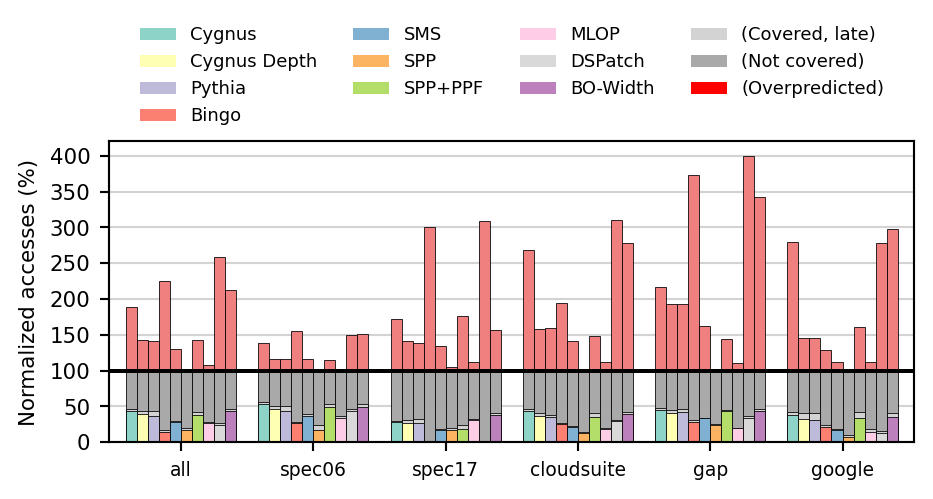

In [12]:
plots.plot_overprediction_means(degreedyn_1core_df, suites=suites,
                                colors=degreedyn_1core_colors,
                                hatches=degreedyn_1core_hatches,
                                legend_kwargs=degreedyn_1core_legend_kwargs,
                                label_kwargs=degreedyn_1core_label_kwargs,
                                add_suptitle=False, add_xlabel=False,
                                ymin=0, ymax=420,
                                ytick_distance=50,
                                dpi=192, figsize=(5, 2.7))

=== spec06 weighted ===
=== spec17 weighted ===
=== cloudsuite weighted ===
=== gap one_phase ===
=== google one_phase ===


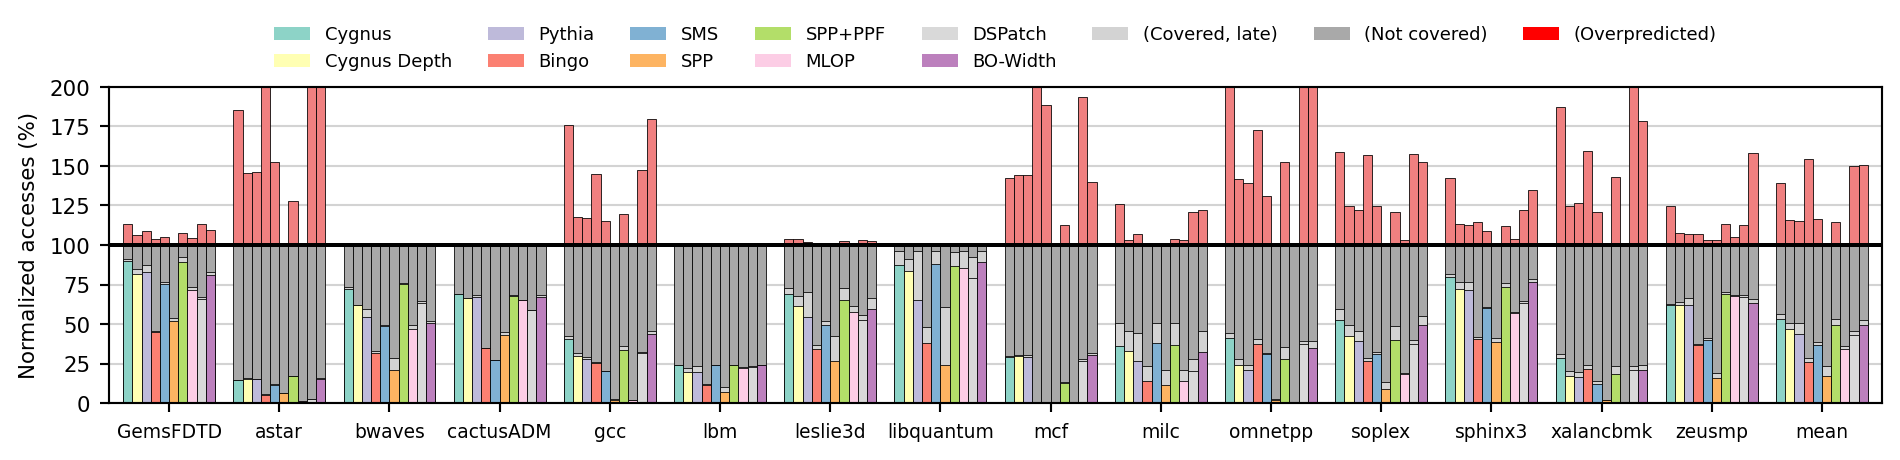

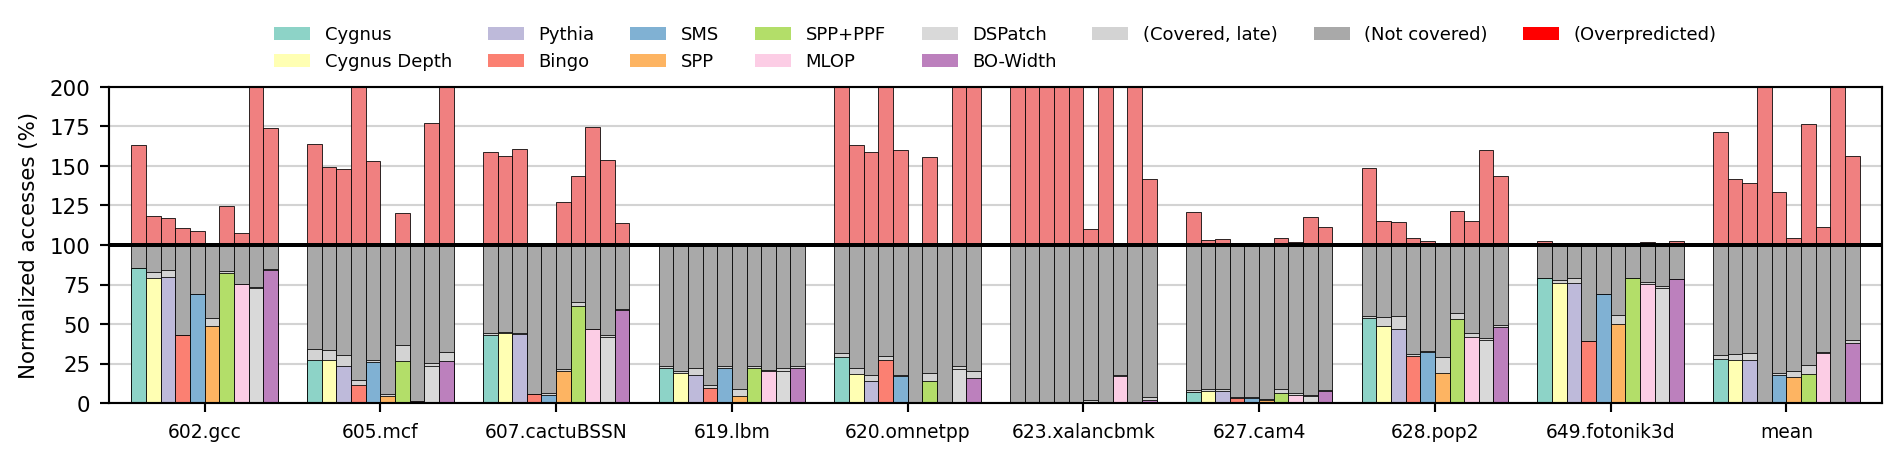

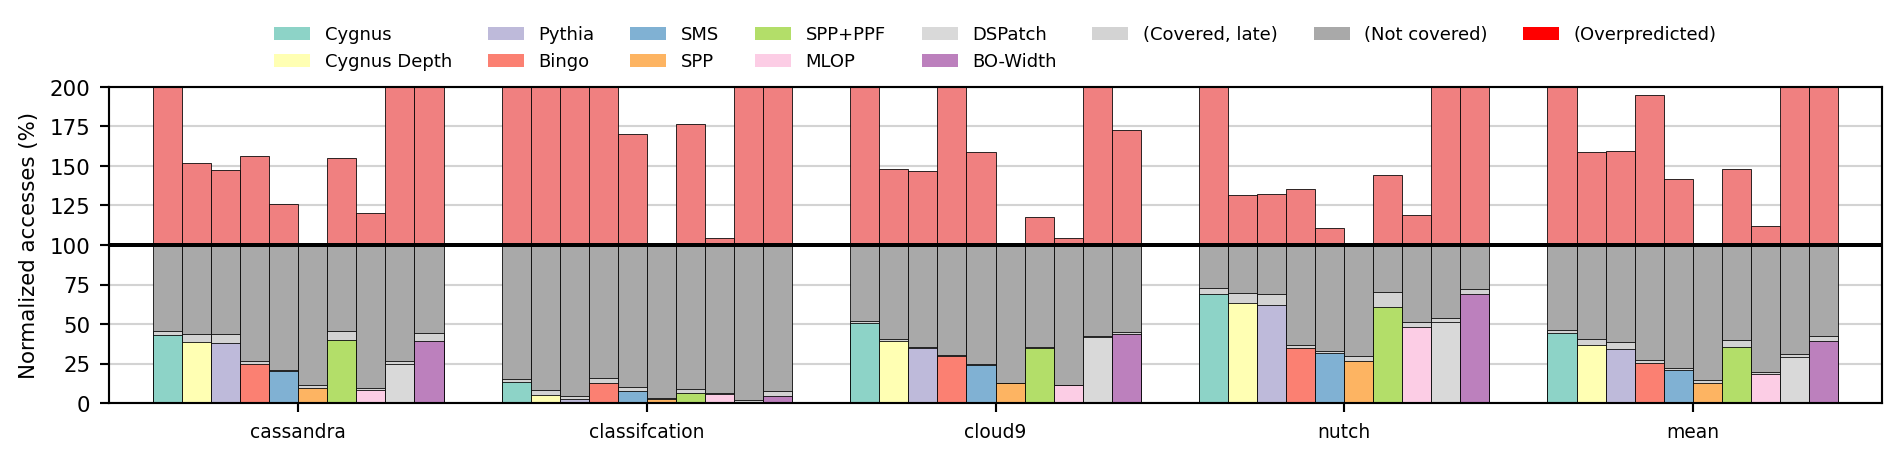

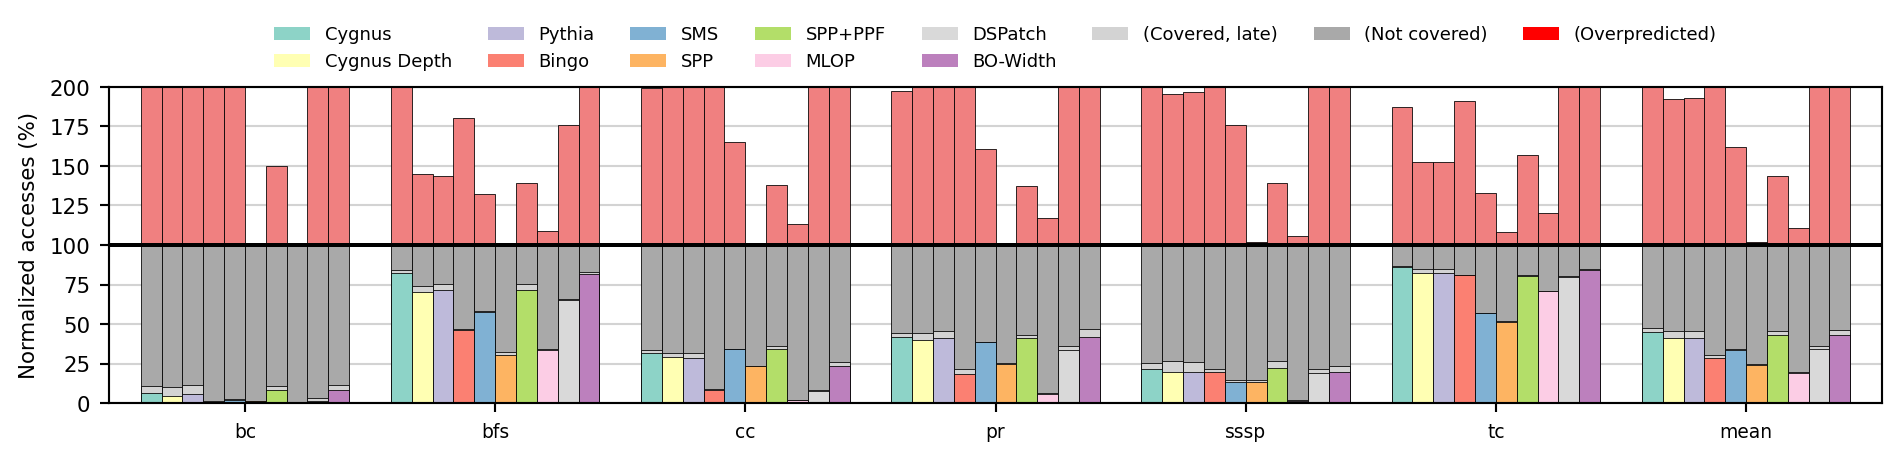

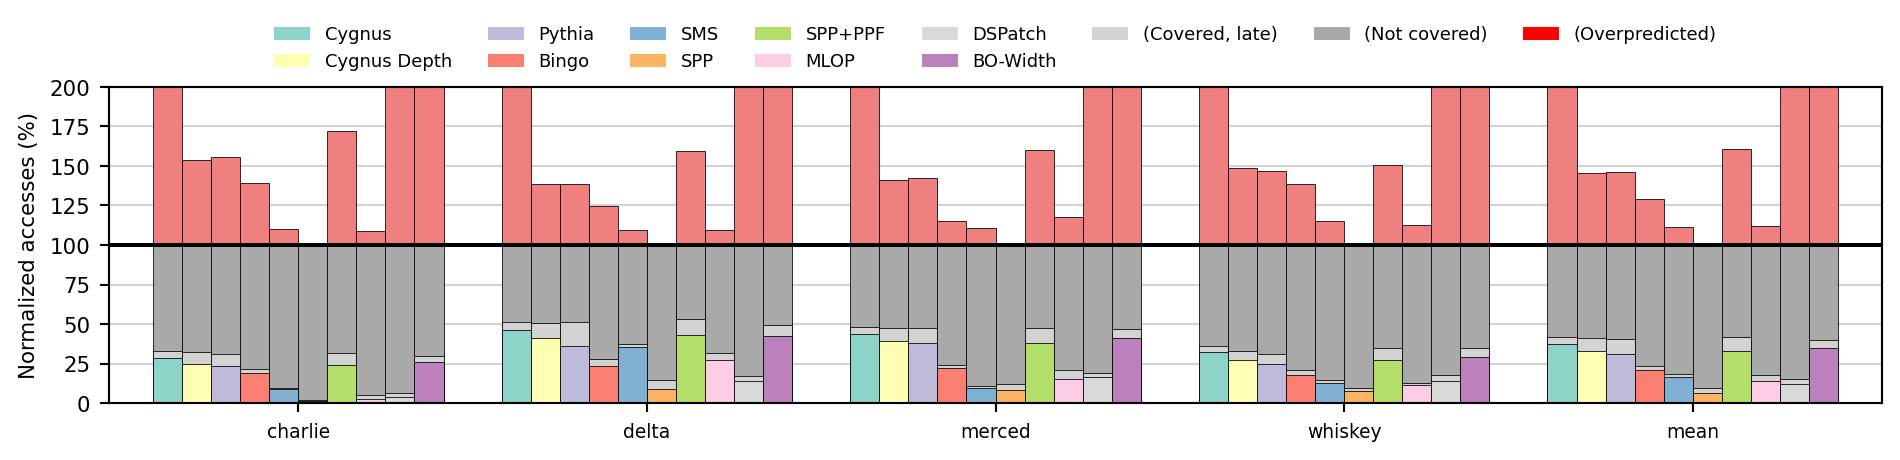

In [13]:
plots.plot_everything_overpredictions(degreedyn_1core_df, 
                                      suites=suites,
                                      level='L2C', 
                                      colors=degreedyn_1core_colors, hatches=degreedyn_1core_hatches,
                                      legend_kwargs=degreedyn_1core_legend_kwargs_wide,
                                      label_kwargs=degreedyn_1core_label_kwargs,
                                      add_suptitle=False, add_xlabel=False,
                                      #ylabel='Prefetch coverage (%)',
                                      ytick_distance=25,
                                      ymin=0, ymax=200,
                                      annotate_outliers = False,
                                      dpi=192, figsize=(10, 2.5))
#from matplotlib import pyplot as plt
#plt.savefig('../../cvs/papers/micro-23r/figures/coverage_spec06.pdf')

# Tables

## Degree 1

In [12]:
tables.table_everything(degree1_1core_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


KeyError: 'L1D_overpredictions'

In [ ]:
reload(tables)
tables.table_metric_all(degree1_1core_df, suites, 'ipc_improvement')

## Dynamic degree

In [14]:
tables.table_everything(degreedyn_1core_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Cygnus,Cygnus Depth,Pythia,Bingo,SMS,SPP,SPP+PPF,MLOP,DSPatch,BO-Width
run_name,,,,,,,,,,
GemsFDTD_weighted,113.490714,83.128113,85.386640,25.081134,67.357914,85.172613,101.467501,61.225116,46.327058,73.245812
astar_weighted,7.405985,6.929338,6.840740,7.653001,5.502414,3.356115,6.913059,6.160166,7.407362,7.283523
bwaves_weighted,56.546326,38.858381,37.056804,18.201583,33.220604,36.986226,61.281410,32.027953,42.771218,32.820078
cactusADM_weighted,10.832286,9.825491,10.359788,3.846373,2.956818,9.943292,10.624407,9.760108,8.550626,10.425421
gcc_weighted,39.446507,22.000398,19.597798,20.934869,14.161941,8.320811,28.026572,19.902321,23.121408,39.670022
lbm_weighted,41.389733,32.671541,36.226024,17.040436,42.223914,37.496090,43.441944,38.445504,41.539915,45.174943
leslie3d_weighted,87.695292,69.605934,66.927458,26.514923,43.963705,67.992813,83.481490,65.997134,53.397504,71.425306
libquantum_weighted,110.305652,88.189873,82.715361,50.131339,114.416215,89.377622,109.782222,111.449341,105.367880,111.005223
mcf_weighted,29.861211,30.879042,30.557541,-1.240288,0.513332,1.448175,11.989272,16.094884,29.331176,30.240022


=== spec17 weighted ===
ipc_improvement


,Cygnus,Cygnus Depth,Pythia,Bingo,SMS,SPP,SPP+PPF,MLOP,DSPatch,BO-Width
run_name,,,,,,,,,,
602.gcc_weighted,67.921657,59.923215,63.015705,32.136772,55.125179,57.492653,66.506676,66.397211,62.026831,68.251173
605.mcf_weighted,15.161217,13.834278,11.886368,-3.175980,12.199990,12.397118,19.551786,1.762471,7.002320,7.275315
607.cactuBSSN_weighted,6.713862,6.749426,6.729014,0.067689,0.041901,5.153328,5.832238,6.188277,6.427220,5.806051
619.lbm_weighted,18.784503,13.863896,18.504989,8.712321,20.310039,20.245193,19.782796,17.225344,19.339309,20.358760
620.omnetpp_weighted,11.024476,5.417907,5.207510,11.581888,6.710528,0.609158,5.727919,4.841974,7.963964,5.539280
623.xalancbmk_weighted,11.604586,8.520345,8.513155,-1.471085,11.285434,10.136131,9.465299,13.565836,3.595425,14.251293
627.cam4_weighted,1.762277,1.587408,1.612625,0.576671,0.525048,1.236650,1.571943,1.659765,1.285577,1.735600
628.pop2_weighted,18.988444,15.576314,15.502711,7.948551,8.497510,13.915945,18.246277,15.303982,13.571236,15.773817
649.fotonik3d_weighted,84.684989,73.523253,78.445511,27.917987,65.718011,76.335315,81.662833,75.483800,65.639937,79.920785


=== cloudsuite weighted ===
ipc_improvement


,Cygnus,Cygnus Depth,Pythia,Bingo,SMS,SPP,SPP+PPF,MLOP,DSPatch,BO-Width
run_name,,,,,,,,,,
cassandra_weighted,14.415526,14.285433,13.949091,9.233691,5.597819,8.528260,15.216736,9.435575,7.406337,12.699246
classifcation_weighted,-7.529296,-5.587508,-5.908884,-5.900863,-4.211100,-2.047667,-4.841193,-7.210271,-8.769591,-8.888049
cloud9_weighted,19.380071,13.340315,11.498684,10.380361,6.276385,4.820012,10.420423,9.777340,14.538494,14.258090
nutch_weighted,8.379357,7.323566,6.695177,4.240967,4.445951,4.453457,7.637321,6.238434,5.744247,7.950779
mean,8.166277,7.034790,6.271914,4.284106,2.937740,3.867855,6.842542,4.318948,4.374507,6.084583


=== gap one_phase ===
ipc_improvement


,Cygnus,Cygnus Depth,Pythia,Bingo,SMS,SPP,SPP+PPF,MLOP,DSPatch,BO-Width
run_name,,,,,,,,,,
bc,21.333950,20.761149,20.827960,15.428246,11.992219,11.560361,17.830178,17.015985,18.316233,20.212799
bfs,60.684809,42.828143,43.590210,26.467580,28.787723,26.489479,45.564137,46.013932,40.276972,59.593389
cc,38.818863,37.230676,36.333608,17.083272,36.728186,33.141471,37.836747,29.947603,15.641450,37.763825
pr,2.316649,2.195564,2.230045,1.011579,1.501131,-0.321155,2.138630,0.957452,1.393678,2.520729
sssp,28.041631,24.880863,24.062173,20.657790,15.996913,21.249767,25.182352,25.785329,23.176042,28.915167
tc,25.539485,25.399984,25.393812,23.670423,16.350465,17.041549,23.946955,22.193815,23.412655,24.232129
mean,28.256853,24.854138,24.709118,17.083696,18.014209,17.692902,24.625665,22.895947,19.813800,27.714950


=== google one_phase ===
ipc_improvement


,Cygnus,Cygnus Depth,Pythia,Bingo,SMS,SPP,SPP+PPF,MLOP,DSPatch,BO-Width
run_name,,,,,,,,,,
charlie,4.121764,5.931077,5.431370,2.094607,1.470670,2.157483,5.256459,1.147651,-1.432564,4.050504
delta,21.774678,21.963396,21.433061,10.581752,13.324999,13.937706,22.811514,12.795918,2.187824,18.702359
merced,24.767735,22.327116,22.249402,6.892404,0.974427,13.704574,21.585828,18.029217,5.165767,23.674007
whiskey,8.454938,9.656607,8.383209,1.750326,1.331196,4.549820,9.027179,3.870414,-2.118134,4.455852
mean,14.449140,14.736767,14.124500,5.266996,4.149024,8.457533,14.413269,8.750846,0.908398,12.390263


In [15]:
tables.table_metric_all(degreedyn_1core_df, suites, 'ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Cygnus,28.656042,44.153253,23.721847,8.166277,28.256853,14.449140
Cygnus Depth,23.622722,34.164264,19.993765,7.034790,24.854138,14.736767
Pythia,23.378969,33.450574,20.892690,6.271914,24.709118,14.124500
Bingo,12.413990,17.731201,8.736622,4.284106,17.083696,5.266996
SMS,18.180133,28.061258,18.179166,2.937740,18.014209,4.149024
SPP,19.149142,28.171351,19.696563,3.867855,17.692902,8.457533
SPP+PPF,26.138239,39.689547,22.847397,6.842542,24.625665,14.413269
MLOP,21.511801,32.078924,20.006567,4.318948,22.895947,8.750846
DSPatch,19.722643,31.779871,18.741318,4.374507,19.813800,0.908398
BO-Width,25.518713,38.295443,21.739574,6.084583,27.714950,12.390263


In [16]:
tables.table_metric_all(degreedyn_1core_df, suites, 'L2C_accuracy')

,all,spec06,spec17,cloudsuite,gap,google
Cygnus,60.878433,68.463359,66.727828,46.121414,57.252141,43.159532
Cygnus Depth,74.083476,79.875589,75.792868,61.293705,69.676568,71.114493
Pythia,73.391799,79.011588,75.060223,60.198832,70.172008,69.884532
Bingo,60.464186,69.064610,60.624434,48.001976,49.954312,59.194609
SMS,68.120334,75.662659,64.897848,56.401426,63.755377,68.283285
SPP,87.670925,87.929597,75.636054,95.228851,94.299326,94.389356
SPP+PPF,71.790405,77.482758,74.848967,61.295523,68.988761,60.883390
MLOP,69.543800,67.153051,49.071754,77.853506,91.911933,80.631876
DSPatch,54.112985,66.070168,53.650899,40.265381,49.932331,33.893726
BO-Width,64.312635,71.348475,68.643929,46.262172,66.122496,48.031109


In [17]:
tables.table_metric_all(degreedyn_1core_df, suites, 'L2C_coverage')

,all,spec06,spec17,cloudsuite,gap,google
Cygnus,43.210927,53.043541,27.606757,44.072609,45.060373,37.596735
Cygnus Depth,38.671444,46.763338,27.277579,36.701238,40.983415,32.957843
Pythia,37.018277,43.585366,27.314824,34.459688,41.445025,30.782576
Bingo,14.610985,26.270901,-22.995535,25.579121,28.704823,20.650042
SMS,27.838810,36.890113,17.547465,20.997998,33.770240,16.705825
SPP,16.552168,17.408557,16.535182,12.862664,24.132889,6.619731
SPP+PPF,37.748069,49.126566,18.539369,35.560167,42.968645,33.202290
MLOP,27.057387,33.949624,31.455005,18.402695,19.110814,14.055081
DSPatch,24.093804,43.356384,-12.228746,29.031512,34.299618,12.104005
BO-Width,42.937754,49.208360,38.153579,39.034313,43.178257,34.705921
